<a href="https://colab.research.google.com/github/EnoiuDiana/Stroke-Predictor/blob/bori_dev/Stroke_Predictor_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction based on medical and demographical data

## Problem Statement

This project is aimed to help to **decide whether a person is likely to get a stroke**, based on demographical and medical data.

Thus, we framed the problem as a **classification problem**: we intend to tell only whether someone is likely or not to get a stroke, we do not try to precisely predict the likelihood of a stroke.



### Background: what is a Stroke?

([source 1: NHS](https://www.nhs.uk/conditions/stroke/#:~:text=A%20stroke%20is%20a%20serious,damage%20is%20likely%20to%20happen.))

([source 2: CDC](https://www.cdc.gov/stroke/index.htm#:~:text=Stroke%20is%20a%20leading%20cause,of%20serious%20disability%20for%20adults.&text=About%20795%2C000%20people%20in%20the%20United%20States%20have%20a%20stroke%20each%20year.&text=Get%20more%20quick%20facts%20about,Stroke%20is%20preventable.))

A stroke is the event in which the flow of blood to a part of the brain is cut off, thus causing the brain cells to get demaged or die. The effects may include a permanent brain demage, long-term disabilities or even death. 

The direct cause of a stroke is generally a blood clot / a piece of fatty material, blocking an artery (Ischaemic stroke), or the walls of a blood vessel in the brain becoming weak and burst (Haemorrhagic stroke).

It is one of the leading death causes and requires urgent treatment. It is reported to cause almost 800 000 deaths each year in the USA.

### Why our analysis is relevant?

The good thing about strokes is that they're somewhat **preventable** with a healthy lifestyle and also **treatable**, if the patient gets the treatment in time.

**Our analysis will focus on the prevention: we try to understand what life-style choises help to reduce one's exposure to stroke.**

## Data Fetching



*   [source](https://https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

**The structure of the dataset**

*   each entry represents one person
*   **label**, to be predicted: boolean variable 'stroke', that tells whether a person is likely to have a stroke
*   **features**, to rely on for the prediction:
  * demographical 
      * *gender* : male, female or other
      * *age*
      * *marital status (ever_married)* : was the person ever married?
      * *work type (work_type)* : children, government job ('Govt_job'), never worked ('never_worked'), private, self-employed
      * *residence (residence_type)* : urban or rural
      * *smoking status* : 'never smoked', 'formerly smoked', 'smokes', 'unknown'
   * medical data
      * *hypertension*: 0, if the patient doesn't have hypertension, 1 otherwise
      * *heart disease (heart_disease)* : 0 if the patient doesn't have any heart disease, 1 otherwise
      * *average blood glucose level (avg_glucose_level)*
      * *body mass index (bmi)*



As expected, the dataset contains the labels as well. Stroke prediction based on demographic and medical data seems much better suited for **supervised learning** indeed, because we would not expect to find a clear separation between people with and without a stroke that could be easily found by a clustering algorithm.

On the other hand, it seems promising to analyse time series representing purely medical data about the patients, such as the blood pressure, cholesterol level, ecg, ..., and try to detect anomalies relying on unsupervised learning algorithms in these time series to predict a stroke.

Note that these two approaches are both feasible but could be used for entirely different purposes:


*   our supervised-learning approach based on medical and demographical data helps to find what lifestyle helps to prevent a stroke
*   a time-series based unsupervised anomaly detection might help to detect the early signs of a stroke and ensure that the patient gets the necessary treatment as soon as possible, thus minimizing the effects of a stroke



## Setup

In [286]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import sys
assert sys.version_info >= (3, 5)
import warnings
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import FunctionSampler
import random as python_random
from tensorflow.keras import regularizers
from sklearn import set_config

In [287]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import tensorflow as tf
assert tf.__version__ >= "2.0"
import os
from tensorflow import keras

In [288]:
def_plot_length = 7
def_fig_size = (def_plot_length, def_plot_length)
def_title_size = 20
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [289]:
def reset_seeds():
   np.random.seed(random_state) 
   python_random.seed(random_state)
   tf.random.set_seed(random_state)

### Data Gathering

In [290]:
file_path = "https://drive.google.com/file/d/1x3Vu2Egi5LIvd0jkHnZKeBx-Ye0l8sTr/view?usp=sharing"
file_path ='https://drive.google.com/uc?id=' + file_path.split('/')[-2]
stroke_df = pd.read_csv(file_path)

In [291]:
stroke_df = stroke_df.rename(str.lower, axis='columns')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Train-Test Split

We split the dataset such that the ratio of those with a stroke is preseved in both parts.

*   **stroke_df**: dataframe used for training and validation
*   **stroke_test_df**: dataframe used for testing. Not used in the decision processer related to model training



In [292]:
X = stroke_df.drop(columns=['stroke'])
y = stroke_df.stroke

In [293]:
X_stroke_tv_df, X_stroke_test_df, y_stroke_tv_df, y_stroke_test_df = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

In [294]:
X_stroke_tv_df.shape

(4088, 11)

In [295]:
X_stroke_test_df.shape

(1022, 11)

In [296]:
stroke_df = pd.concat([X_stroke_tv_df, y_stroke_tv_df], axis = 1)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
845,25283,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0
3744,43734,Male,15.0,0,0,No,Private,Rural,122.25,21.0,never smoked,0
4183,47113,Female,67.0,0,0,Yes,Self-employed,Rural,110.42,24.9,never smoked,0
3409,56996,Male,44.0,0,0,Yes,Private,Urban,65.41,24.8,smokes,0
284,26325,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0


In [297]:
stroke_test_df = pd.concat([X_stroke_test_df, y_stroke_test_df], axis = 1)

In [298]:
print("Stroke ratio in train-test dataframe: ", stroke_df[stroke_df.stroke == 1].shape[0] / stroke_df.shape[0])

Stroke ratio in train-test dataframe:  0.04867906066536203


In [299]:
print("Stroke ratio in train-test dataframe: ", stroke_test_df[stroke_test_df.stroke == 1].shape[0] / stroke_test_df.shape[0])

Stroke ratio in train-test dataframe:  0.04892367906066536


--> the train+validation and the test datasets are well balanced regarding the ratio of people who had stroke

### Verify the structure of train and test datasets

In this section we'll verify that 
- the distributions of the variables are approximately the same in both datasets
- the range of values in the same in both datasets

to ensure that the train dataset is representative for the full one and the cleaning process applied on it will be suitable for the test dataset as well.

#### Helper functions


In [ ]:
def plot_nominal_variables_distribution(df, var_name, figsize=(15,10), rotate_degree = 45):
  df[var_name].value_counts().plot(kind='bar', figsize=figsize)
  plt.title(var_name)
  plt.xticks(rotation = rotate_degree)


In [ ]:
def generate_distribution_subplots_for_nominal_variables(df, nr_rows = 3, nr_cols = 2, hspace=0.6, wspace=0.4):
  # Get list of categorical variables
  s = (df.dtypes == 'object')
  var_names = list(s[s].index)

  for (index, var_name) in enumerate(var_names):
    plt.subplot(nr_rows, nr_cols, index+1)
    plot_nominal_variables_distribution(df, var_name)
    plt.xticks(rotation = 45)
  plt.subplots_adjust(hspace=hspace, wspace=wspace)

#### Plots

From the following plots we can draw the conclusion that the test dataframe maintains the structure of the train dataframe.

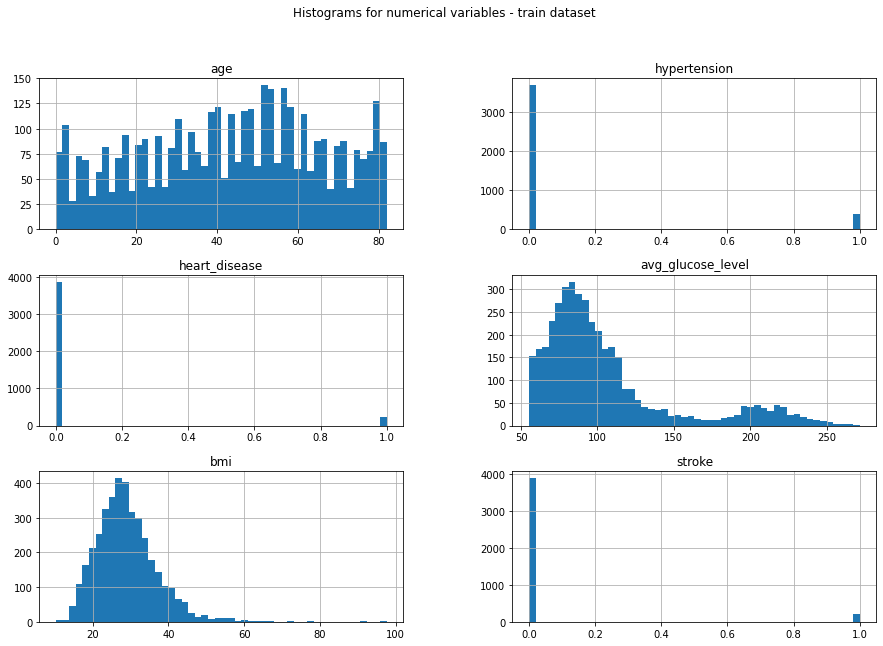

In [ ]:
stroke_df.drop(['id'], axis=1).hist(bins=50, figsize=(15,10), histtype='bar')
plt.suptitle('Histograms for numerical variables - train dataset')
plt.show()

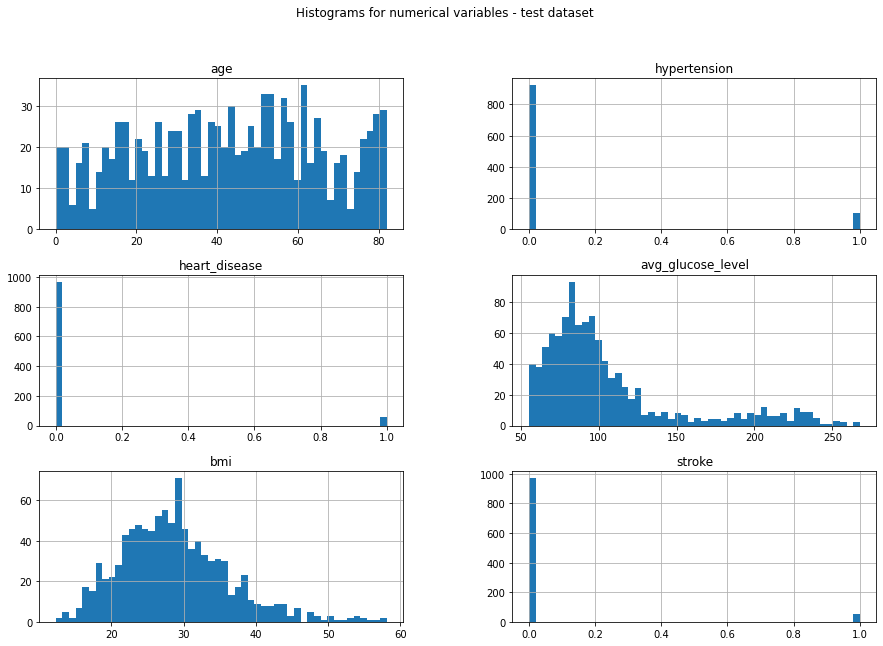

In [ ]:
stroke_test_df.drop(['id'], axis=1).hist(bins=50, figsize=(15,10), histtype='bar')
plt.suptitle('Histograms for numerical variables - test dataset')
plt.show()

*   Heart_disease, hypertension and stroke seem to mantain the same proportions. 
*   The age and average glucose also seem to maintain almost the same shape, with no significant differences
*   **The body mass index ranges seem to differ quite significnatly**: in the test dataset, only BMI values up to ~60 appear, whereas in the training dataset we can see even a few BMI values up to ~100. Knowning that a BMI of 35 is elrady considered severely obese, the >60 values may be considered **outliers** and should be removed from the dataset in the cleaning process.


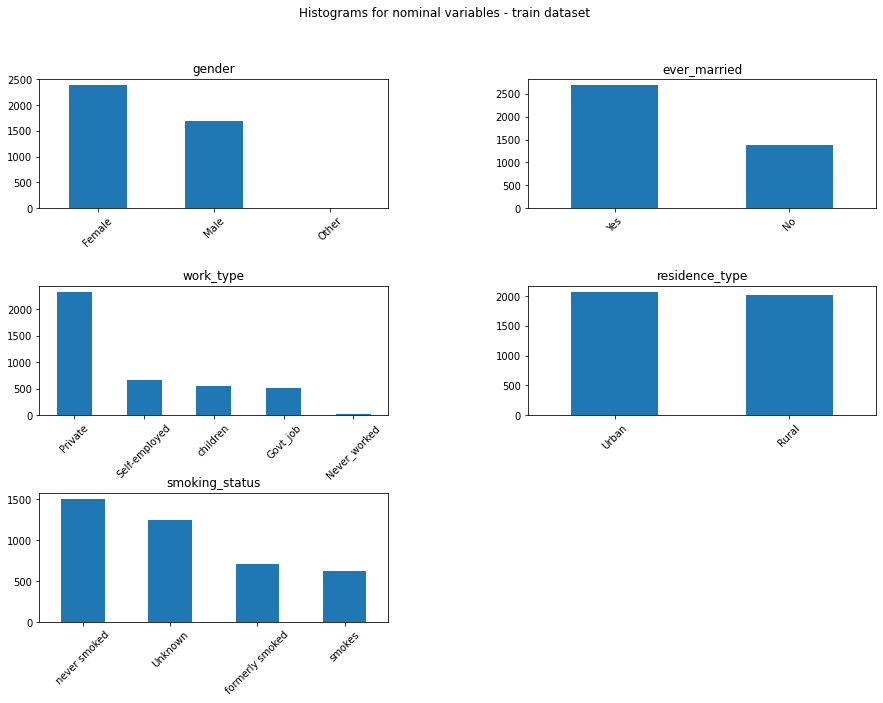

In [ ]:
plt.suptitle('Histograms for nominal variables - train dataset')
generate_distribution_subplots_for_nominal_variables(stroke_df)
plt.show()

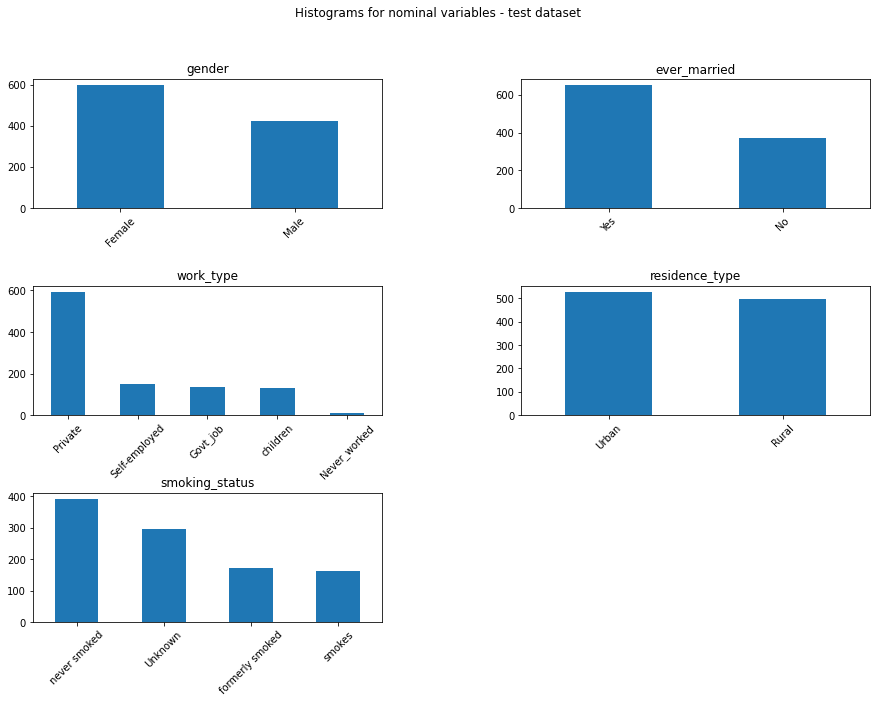

In [ ]:
plt.suptitle('Histograms for nominal variables - test dataset')
generate_distribution_subplots_for_nominal_variables(stroke_test_df)
plt.show()

We do not have other as a gender in the test dataframe, since we have too few entries with that value. Even if never_worked values from work_type are very few we still have some values in the test set. We should see how we handle those values when we will perform data cleaning.

## Initial Data Analysis

The goal of the following section is to
*   get to know our data: 
    * the range/value set and distribution of ecah variable
    * how each variable is related to the target ' stroke'
*   observe what features require a cleaning

Note that this initial analysis does not address correlations yet.

In [ ]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3918.000000,4088.000000
mean,36547.666585,43.353288,0.097114,0.054061,106.317167,28.922180,0.048679
std,21238.482961,22.596816,0.296148,0.226165,45.259652,7.928378,0.215223
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17621.500000,26.000000,0.000000,0.000000,77.312500,23.600000,0.000000
50%,36963.500000,45.000000,0.000000,0.000000,91.945000,28.000000,0.000000
75%,54787.750000,61.000000,0.000000,0.000000,114.197500,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Analysing the individual features

#### Helper functions

In [ ]:
def plot_continuous_variable_distribution(df, var_series, var_name, title):
  sns.displot(data=df, x=var_name, kde=True, height=def_plot_length)
  # median
  disp = 0.4
  plt.axvline(x=var_series.median(),
              color='red')
  plt.text(var_series.median() + disp, 0, "50%", rotation = 90)
  # 25%
  plt.axvline(x=var_series.quantile(0.25),
              color='red')
  plt.text(var_series.quantile(0.25) + disp, 0, "25%", rotation = 90)
  # 75%
  plt.axvline(x=var_series.quantile(0.75),
              color='red')
  plt.text(var_series.quantile(0.75) + disp, 0, "75%", rotation = 90)
  # mean
  plt.axvline(x=var_series.mean(),
              color='green')
  plt.text(var_series.mean() + disp, 0, "Mean", rotation = 90)

  plt.title(title, size=def_title_size)

In [ ]:
def plot_continuous_variable_stroke_ratio(df, var_name, no_quantiles, title, xticks_rotation=0, nr_bar_decimals=2, nr_tick_decimals = 2):
  stroke_df_group = df.copy()
  stroke_df_group[var_name+"_group"] = pd.qcut(stroke_df_group[var_name], q=no_quantiles)
  stroke_ratio_per_var_group = stroke_df_group.groupby([var_name+"_group"]).apply(lambda age_group: age_group["stroke"].sum() / age_group["stroke"].count())
  fig, ax = plt.subplots(figsize=def_fig_size)
  pal = sns.color_palette("rocket", len(stroke_ratio_per_var_group))
  rank = stroke_ratio_per_var_group.argsort().argsort() 

  plots = sns.barplot(x = stroke_ratio_per_var_group.index, y = stroke_ratio_per_var_group.values, ax = ax, palette = np.array(pal[::-1])[rank])
  print(type(stroke_ratio_per_var_group.index[0]))

  # Iterating over the bars one-by-one to add annotations
  for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.{0}f'.format(nr_bar_decimals)),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
      
  xlabels = stroke_ratio_per_var_group.index.map(lambda interval : "({left:.{nr_dec}f}, {right:.{nr_dec}f}".format(nr_dec = nr_tick_decimals, left = interval.left, right = interval.right))
  ax.set_xticklabels(xlabels)
      
  plt.xticks(rotation=xticks_rotation)
  plt.title(title, size = def_title_size)


In [ ]:
def plot_categorical_variable_stroke_ratio(df, var_name, title, nr_bar_decimals=2):
  stroke_cnt = df.groupby([var_name, 'stroke']).count()
  stroke_cnt = stroke_cnt.loc[:, :, ] .reset_index().pivot(index=var_name, columns='stroke', values='id')
  stroke_cnt['stroke_ratio'] = stroke_cnt[1] / (stroke_cnt[0] + stroke_cnt[1])

  fig, ax = plt.subplots(figsize=(10, 6))
  pal = sns.color_palette("rocket", len(stroke_cnt))
  rank = stroke_cnt['stroke_ratio'].argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
  plots = sns.barplot(x = stroke_cnt.index, y = stroke_cnt['stroke_ratio'], ax = ax, palette = np.array(pal[::-1])[rank])

  # Iterating over the bars one-by-one to add annotations
  for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.{0}f'.format(nr_bar_decimals)),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')

  plt.title(title, size = def_title_size)

#### Gender

First of all, we should analyze the gender types that we have in our dataset.

In [ ]:
gender_value_counts = stroke_df.gender.value_counts()
gender_value_counts

Female    2395
Male      1692
Other        1
Name: gender, dtype: int64

We only have one value for other gender type, it might not help us with our prediction.

In [ ]:
stroke_df.loc[stroke_df['gender']=='Other']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Having a pie chart will help us visualize better the ratio between females and males. We can observe that this ratio is not very balanced, having 59% females and only 41% male.

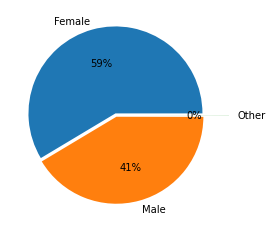

In [ ]:
explode = [0.02,0.02,0.3]
plt.pie(gender_value_counts.array, labels=gender_value_counts.index, autopct = '%0.0f%%', explode = explode)
plt.show()

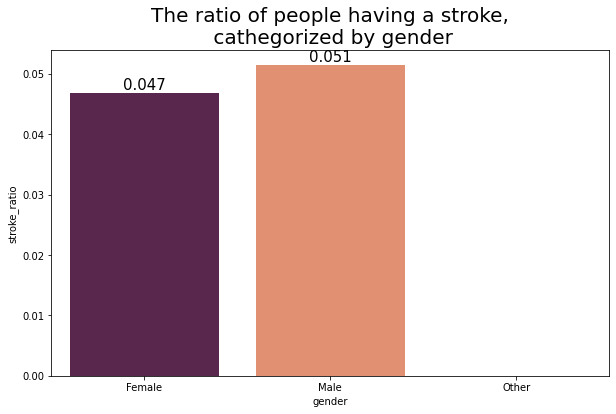

In [ ]:
plot_categorical_variable_stroke_ratio(stroke_df, "gender", "The ratio of people having a stroke,\n cathegorized by gender", 3)

The stroke events are almost evenly split among men and woman, but the ratio of men that had stroke is slightly greater than the ratio of woman, in our dataset. In general it is expected that stroke events are more frequently in woman, as they tend to live longer ([see article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2665267/)).

## Initial Data Analysis

The goal of the following section is to
*   get to know our data: 
    * the range/value set and distribution of ecah variable
    * how each variable is related to the target ' stroke'
*   observe what features require a cleaning

Note that this initial analysis does not address correlations yet.

In [ ]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3918.000000,4088.000000
mean,36547.666585,43.353288,0.097114,0.054061,106.317167,28.922180,0.048679
std,21238.482961,22.596816,0.296148,0.226165,45.259652,7.928378,0.215223
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17621.500000,26.000000,0.000000,0.000000,77.312500,23.600000,0.000000
50%,36963.500000,45.000000,0.000000,0.000000,91.945000,28.000000,0.000000
75%,54787.750000,61.000000,0.000000,0.000000,114.197500,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Analysing the individual features

#### Helper functions

In [ ]:
def plot_continuous_variable_distribution(df, var_series, var_name, title):
  sns.displot(data=df, x=var_name, kde=True, height=def_plot_length)
  # median
  disp = 0.4
  plt.axvline(x=var_series.median(),
              color='red')
  plt.text(var_series.median() + disp, 0, "50%", rotation = 90)
  # 25%
  plt.axvline(x=var_series.quantile(0.25),
              color='red')
  plt.text(var_series.quantile(0.25) + disp, 0, "25%", rotation = 90)
  # 75%
  plt.axvline(x=var_series.quantile(0.75),
              color='red')
  plt.text(var_series.quantile(0.75) + disp, 0, "75%", rotation = 90)
  # mean
  plt.axvline(x=var_series.mean(),
              color='green')
  plt.text(var_series.mean() + disp, 0, "Mean", rotation = 90)

  plt.title(title, size=def_title_size)

In [ ]:
def plot_continuous_variable_stroke_ratio(df, var_name, no_quantiles, title, xticks_rotation=0, nr_bar_decimals=2, nr_tick_decimals = 2):
  stroke_df_group = df.copy()
  stroke_df_group[var_name+"_group"] = pd.qcut(stroke_df_group[var_name], q=no_quantiles)
  stroke_ratio_per_var_group = stroke_df_group.groupby([var_name+"_group"]).apply(lambda age_group: age_group["stroke"].sum() / age_group["stroke"].count())
  fig, ax = plt.subplots(figsize=def_fig_size)
  pal = sns.color_palette("rocket", len(stroke_ratio_per_var_group))
  rank = stroke_ratio_per_var_group.argsort().argsort() 

  plots = sns.barplot(x = stroke_ratio_per_var_group.index, y = stroke_ratio_per_var_group.values, ax = ax, palette = np.array(pal[::-1])[rank])
  print(type(stroke_ratio_per_var_group.index[0]))

  # Iterating over the bars one-by-one to add annotations
  for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.{0}f'.format(nr_bar_decimals)),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
      
  xlabels = stroke_ratio_per_var_group.index.map(lambda interval : "({left:.{nr_dec}f}, {right:.{nr_dec}f}".format(nr_dec = nr_tick_decimals, left = interval.left, right = interval.right))
  ax.set_xticklabels(xlabels)
      
  plt.xticks(rotation=xticks_rotation)
  plt.title(title, size = def_title_size)


In [ ]:
def plot_categorical_variable_stroke_ratio(df, var_name, title, nr_bar_decimals=2):
  stroke_cnt = df.groupby([var_name, 'stroke']).count()
  stroke_cnt = stroke_cnt.loc[:, :, ] .reset_index().pivot(index=var_name, columns='stroke', values='id')
  stroke_cnt['stroke_ratio'] = stroke_cnt[1] / (stroke_cnt[0] + stroke_cnt[1])

  fig, ax = plt.subplots(figsize=(10, 6))
  pal = sns.color_palette("rocket", len(stroke_cnt))
  rank = stroke_cnt['stroke_ratio'].argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
  plots = sns.barplot(x = stroke_cnt.index, y = stroke_cnt['stroke_ratio'], ax = ax, palette = np.array(pal[::-1])[rank])

  # Iterating over the bars one-by-one to add annotations
  for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.{0}f'.format(nr_bar_decimals)),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')

  plt.title(title, size = def_title_size)

#### Gender

First of all, we should analyze the gender types that we have in our dataset.

In [ ]:
gender_value_counts = stroke_df.gender.value_counts()
gender_value_counts

Female    2395
Male      1692
Other        1
Name: gender, dtype: int64

We only have one value for other gender type, it might not help us with our prediction.

In [ ]:
stroke_df.loc[stroke_df['gender']=='Other']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Having a pie chart will help us visualize better the ratio between females and males. We can observe that this ratio is not very balanced, having 59% females and only 41% male.

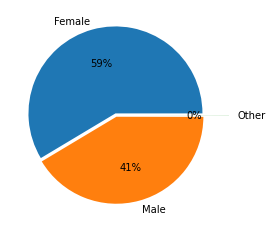

In [ ]:
explode = [0.02,0.02,0.3]
plt.pie(gender_value_counts.array, labels=gender_value_counts.index, autopct = '%0.0f%%', explode = explode)
plt.show()

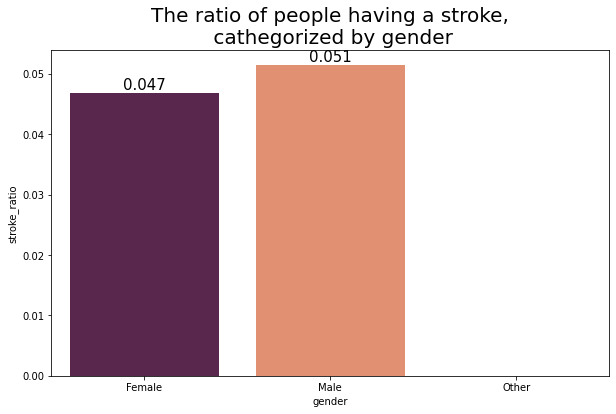

In [ ]:
plot_categorical_variable_stroke_ratio(stroke_df, "gender", "The ratio of people having a stroke,\n cathegorized by gender", 3)

The stroke events are almost evenly split among men and woman, but the ratio of men that had stroke is slightly greater than the ratio of woman, in our dataset. In general it is expected that stroke events are more frequently in woman, as they tend to live longer ([see article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2665267/)).

#### Age

In [ ]:
stroke_df.age.describe()

count    4088.000000
mean       43.353288
std        22.596816
min         0.080000
25%        26.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64



*   **median age: 45.0**
  *   considering that the **median age in the world is only 30.63**, this dataset seems to describe an **aging population**, probably from one of the highly developed countries
  *   note that only 5 countries in he world have a median age >= 5 (Italy, Saint Pierre and Miquelon, Germany, Japan and Monaco)
  *   source: [worldpopulationreview.com](https://worldpopulationreview.com/country-rankings/median-age)



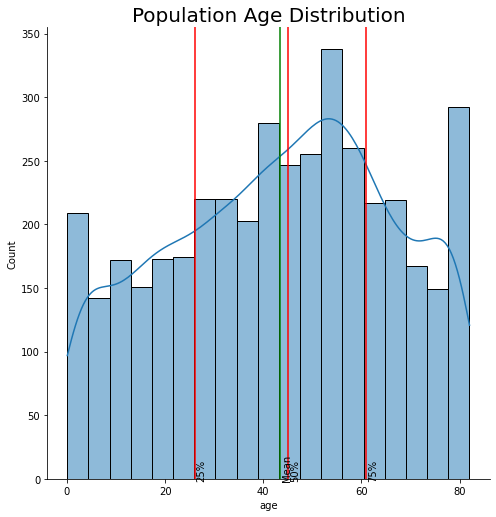

In [ ]:
plot_continuous_variable_distribution(stroke_df, stroke_df.age, "age", "Population Age Distribution")

Text(0.5, 1.0, 'Age Distribution by Stroke Status')

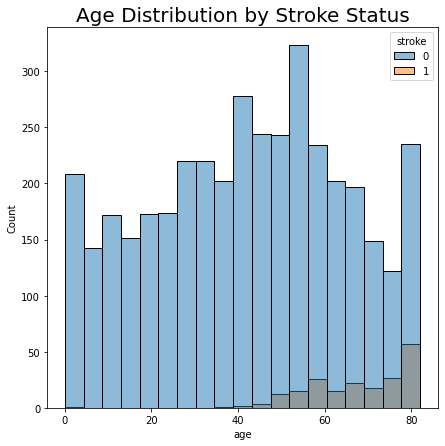

In [ ]:
fig, ax = plt.subplots(figsize=def_fig_size)
sns.histplot(data=stroke_df, x="age", hue="stroke", ax=ax)
plt.title("Age Distribution by Stroke Status", size = def_title_size)

<class 'pandas._libs.interval.Interval'>


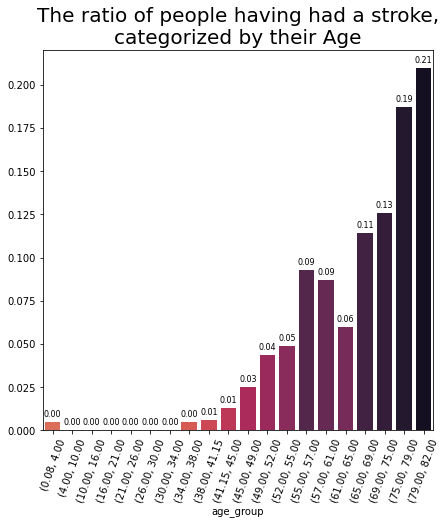

In [ ]:
plot_continuous_variable_stroke_ratio(stroke_df, "age", 20, "The ratio of people having had a stroke,\ncategorized by their Age", 70)

As expected, the ratio of the population who had a stroke increases by age.

#### Hypertension

From all the persons in our dataset, we can see that only 10% have had hypertension. Globally, **an estimated 26% of the world’s population** (972 million people) has hypertension.

https://www.medscape.com/answers/241381-7614/what-is-the-global-prevalence-of-hypertension-high-blood-pressure

In [ ]:
hypertension_value_counts = stroke_df.hypertension.value_counts()
hypertension_value_counts

0    3691
1     397
Name: hypertension, dtype: int64

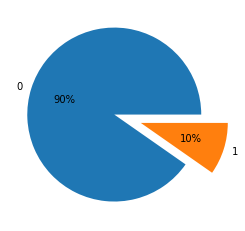

In [ ]:
explode = [0.02,0.3]
plt.pie(hypertension_value_counts.array, labels=hypertension_value_counts.index, autopct = '%0.0f%%', explode = explode)
plt.show()

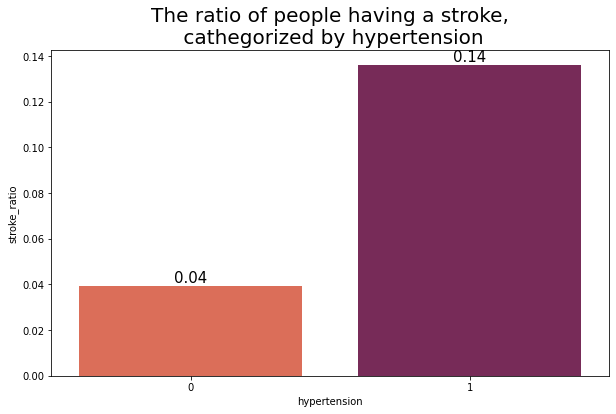

In [ ]:
plot_categorical_variable_stroke_ratio(stroke_df, "hypertension", "The ratio of people having a stroke,\n cathegorized by hypertension")

As expected, a stroke is more common for people that suffer from hypertension than the rest of the people.

#### Heart Disease

The feeature shows whether a person has (1) os hasn't got (0) any herat diseases.

In [ ]:
heart_disease_value_counts = stroke_df.heart_disease.value_counts()
heart_disease_value_counts

0    3867
1     221
Name: heart_disease, dtype: int64

Only 276 people out of 5110 had a heart disease.

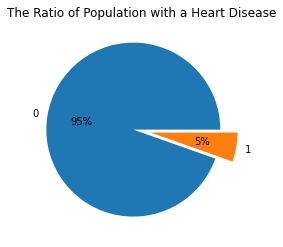

In [ ]:
explode = [0.1] * heart_disease_value_counts.count()
plt.pie(heart_disease_value_counts.array, labels=heart_disease_value_counts.index, autopct = '%0.0f%%', explode = explode)
plt.title("The Ratio of Population with a Heart Disease")
plt.show()

The people with a heart disease represent 5% of the population.

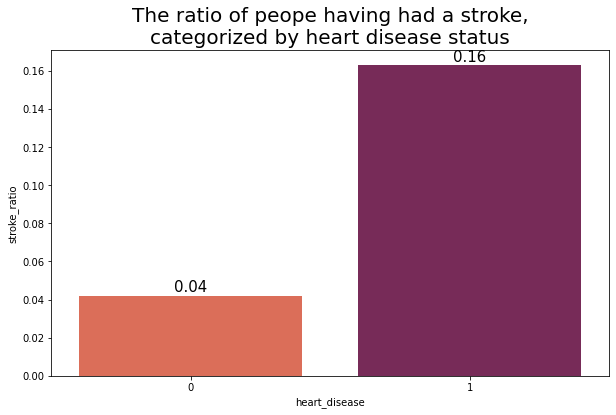

In [ ]:
plot_categorical_variable_stroke_ratio(stroke_df, "heart_disease", "The ratio of peope having had a stroke,\ncategorized by heart disease status")

As expected, the ratio of people who had a stroke is much higher (17% vs 4%) among people with a heart disease.

#### Marital Status

The values for marital status are 'Yes' or 'No' values. We prefer to have 0 or 1 values instead.

In [ ]:
ever_married_value_counts = stroke_df.ever_married.value_counts()
ever_married_value_counts

Yes    2700
No     1388
Name: ever_married, dtype: int64

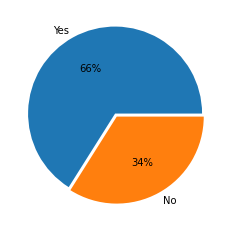

In [ ]:
explode = [0.02,0.02]
plt.pie(ever_married_value_counts.array, labels=ever_married_value_counts.index, autopct = '%0.0f%%', explode = explode)
plt.show()

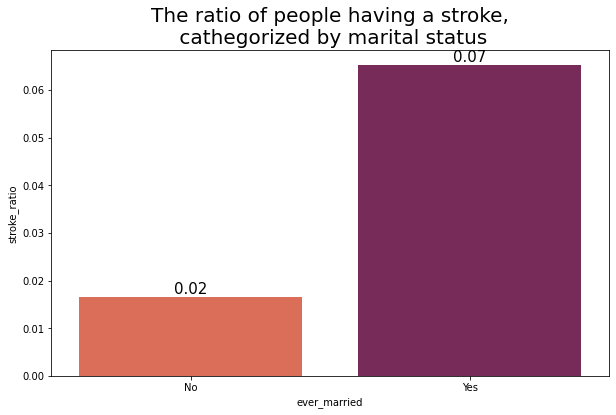

In [ ]:
plot_categorical_variable_stroke_ratio(stroke_df, "ever_married", "The ratio of people having a stroke,\n cathegorized by marital status")

This plot shows that stroke is more common in people who are married, but this may be due to the fact that older people (that are at a higher risk of having a stroke) in general are married. 

#### Work Type

We have identified several work types i.e. private, self-employed, government job, children and never worked.

In [ ]:
work_type_value_counts = stroke_df.work_type.value_counts()
work_type_value_counts

Private          2332
Self-employed     667
children          554
Govt_job          522
Never_worked       13
Name: work_type, dtype: int64

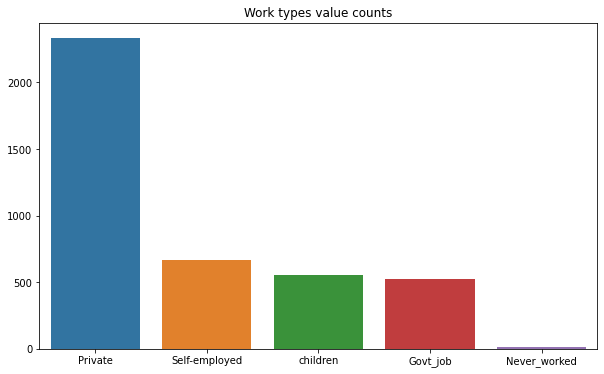

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Work types value counts")
sns.barplot(x=work_type_value_counts.index, y=work_type_value_counts.array)
plt.show()

The values children and never worked might be corellated since most children don't work. Let's see how many never worked values are for people with an age greater than 18.

In [ ]:
stroke_df.loc[(stroke_df['work_type'] == 'Never_worked') & (stroke_df['age'] >= 18)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
4772,13960,Female,18.0,0,0,No,Never_worked,Urban,97.65,21.5,Unknown,0
603,61408,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,13948,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
2917,11702,Female,18.0,0,0,No,Never_worked,Urban,82.36,22.7,Unknown,0


There are only four values for never worked people that aren't children. They also didn't have a stroke. We might consider deleting them in the data cleaning process.

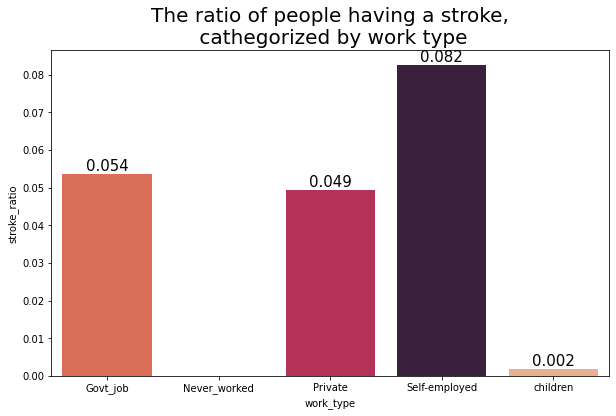

In [ ]:
plot_categorical_variable_stroke_ratio(stroke_df, "work_type", "The ratio of people having a stroke,\n cathegorized by work type", 3)

We can observe that we have very few strokes among children and never_worked (which are mostly children). The stroke events are evenly split among government jobs and private work types, but self-employed people tend to have more strokes. Accordingly to this [study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7287446/), **self-employed people might have a higher risk of having a cardiovascular disease**, which might lead to a stroke, but the studies made about this subject are very limited.

#### Residence Type

The feature shows whether the person lives in a rural or urban area.

In [ ]:
residence_type_value_counts = stroke_df.residence_type.value_counts()
residence_type_value_counts

Urban    2069
Rural    2019
Name: residence_type, dtype: int64

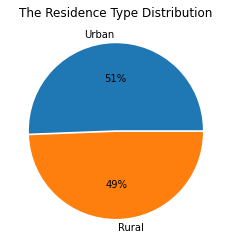

In [ ]:
explode = [0.01] * residence_type_value_counts.count()
plt.pie(residence_type_value_counts.array, labels=residence_type_value_counts.index, autopct = '%0.0f%%', explode = explode)
plt.title("The Residence Type Distribution")
plt.show()

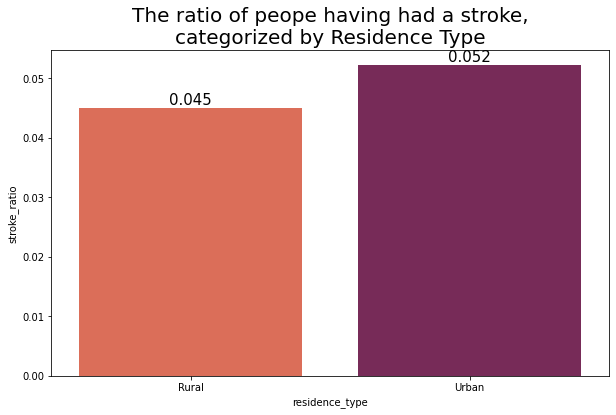

In [ ]:
plot_categorical_variable_stroke_ratio(stroke_df, "residence_type", "The ratio of peope having had a stroke,\ncategorized by Residence Type", 3)

The data shows that people living in an urban area have a slightly higher chance for a stroke (5.2% vs 4.5%), but the residence type does not seem to be a significant factor in one's chance for a stroke.

The people are fairly distributed between twose living in urban and in rural areas.

#### Average Glucose Level

This feature shows the average glucose level in a person's blood, in mg/dL.

In [ ]:
stroke_df.avg_glucose_level.describe()

count    4088.000000
mean      106.317167
std        45.259652
min        55.120000
25%        77.312500
50%        91.945000
75%       114.197500
max       271.740000
Name: avg_glucose_level, dtype: float64

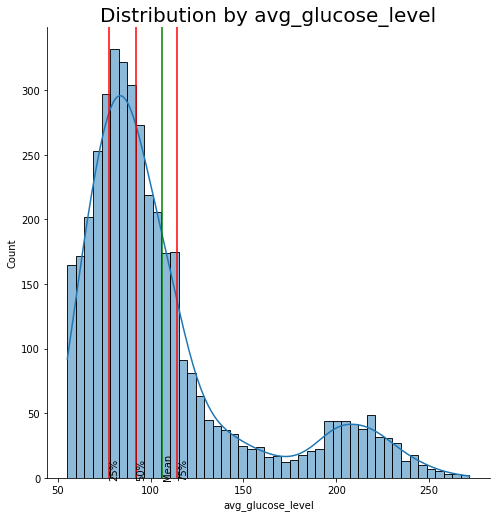

In [ ]:
plot_continuous_variable_distribution(stroke_df, stroke_df.avg_glucose_level, "avg_glucose_level", "Distribution by avg_glucose_level")

Text(0.5, 1.0, 'Avg Glucose Level Distribution by Stroke Status')

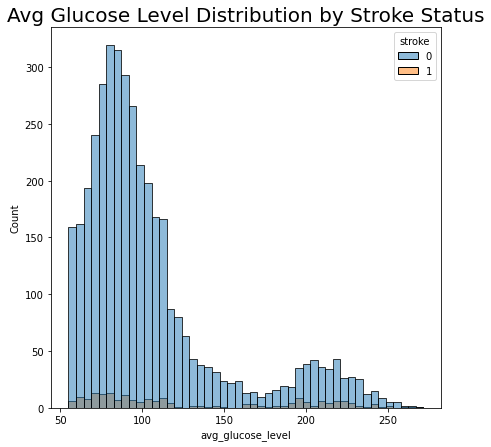

In [ ]:
fig, ax = plt.subplots(figsize=def_fig_size)
sns.histplot(data=stroke_df, x="avg_glucose_level", hue="stroke", ax=ax)
plt.title("Avg Glucose Level Distribution by Stroke Status", size = def_title_size)

<class 'pandas._libs.interval.Interval'>


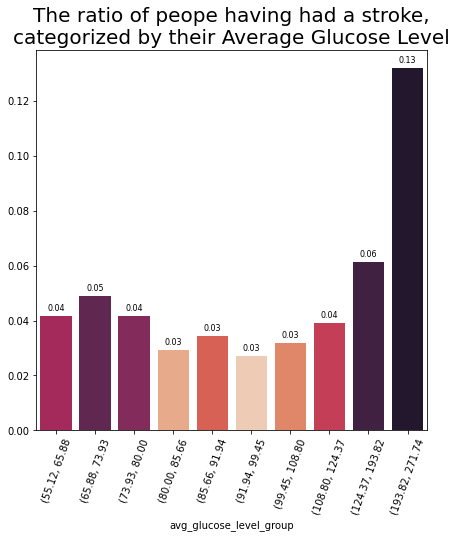

In [ ]:
plot_continuous_variable_stroke_ratio(stroke_df, "avg_glucose_level", 10, "The ratio of peope having had a stroke,\ncategorized by their Average Glucose Level", 70)

As expected, both people with a very low and with a very high blood glucose level are more likely to have a stroke than the people with a regular glucose level. 

General medical guidelines state that a glucose level of less than 100mg/dL is normal after not eating for more than 8 hours, and a glucose level of less than 140mg/dL is normal after not eating for at least 2 hours ([see this analysis](https://https://www.webmd.com/diabetes/how-sugar-affects-diabetes)). These guidelines are confirmed by the above plot, which shows that


*   an average glucose level lower than 80mg/dL may increase the chance for a stroke, by ~30%
*   an average glucose level higher than 124mg/dL may dramatically increase the chance for a stroke, by more than 200%



#### Body Mass Index

There also might be children in our dataset, we do not want to consider them for the adult BMI analysis since the way their BMI is interpreted is different than for adults.

In [ ]:
adults_only_df = stroke_df.loc[stroke_df['age']>=18]
adults_only_df.bmi.describe()

count    3259.000000
mean       30.480700
std         7.278777
min        11.300000
25%        25.500000
50%        29.300000
75%        34.200000
max        92.000000
Name: bmi, dtype: float64

A BMI of: 

* less than 18.5 is Underweight
* 18.5 - 25 is Normal	
* 25 - 30 is Overweight	
* 30 - 35 is Moderate Obesity
* 35 - 40 is Severe Obesity
* 40 - 46 is Very Severe Obesity
* 45-50 is Morbid
* 50-60 is Super
* greater then 60 is Hyper Obesity 
 
Data extracted from this ([article](https://www.topdoctors.co.uk/medical-dictionary/body-mass-index-bmi)).
 
 The fact that we have a mean value of 30 means that the dataset tends to describe a population that is slightly more overweight. 

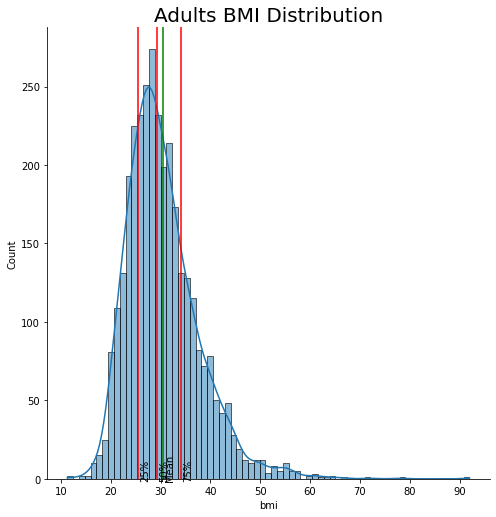

In [ ]:
plot_continuous_variable_distribution(adults_only_df, adults_only_df.bmi, "bmi", "Adults BMI Distribution")

First, we should notice, that the distribution is very right-skewed: we have a few extremely larger BMI values: despite values above 35 are already considered a severe obesity, and those between 50-60 are marked as 'super obesity' we have a few **outliers** with values well above 60. We may consider removing these values, since we do not have enough data for reliable preidctions in case of morbid- and super-obesity.

The data from above might be better understood if we would classify the BMI value by what it represents i.e. underweight, normal, overweight etc.

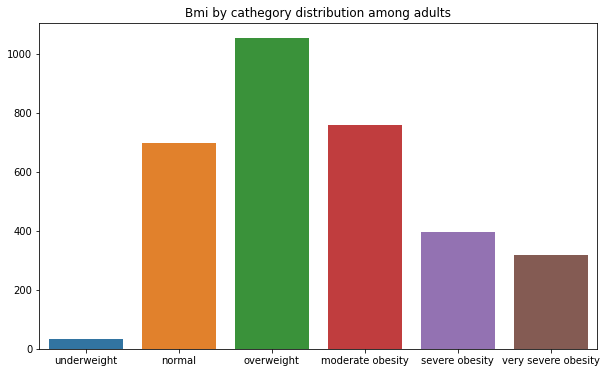

In [ ]:
bmi_categ_list = ['underweight', 'normal', 'overweight',
              'moderate obesity', 'severe obesity', 'very severe obesity']
stroke_df_with_bmi_categ = adults_only_df.copy()
stroke_df_with_bmi_categ.bmi = pd.cut(stroke_df_with_bmi_categ.bmi,
                                      bins=[0, 18.5, 25, 30, 35, 40, 100],
                                      labels=bmi_categ_list)

bmi_categ_value_counts = stroke_df_with_bmi_categ.bmi.value_counts()

plt.figure(figsize=(10,6))
plt.title("Bmi by cathegory distribution among adults")
sns.barplot(x=bmi_categ_value_counts.index, y=bmi_categ_value_counts.array, order=bmi_categ_list)
plt.show()


The distrubution based on the BMI classifications is not very balanced, as is having more cases of overweight and obese people than people with normal weight. 

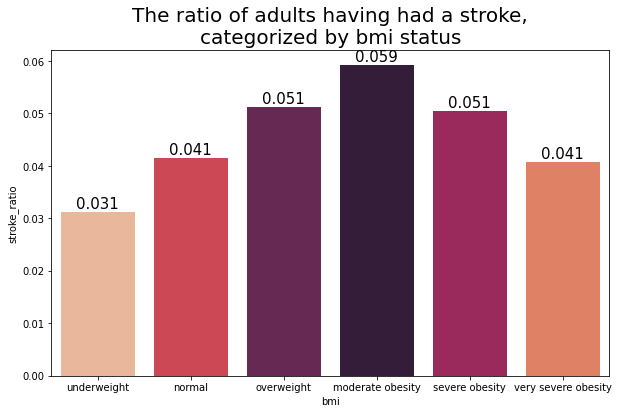

In [ ]:
plot_categorical_variable_stroke_ratio(stroke_df_with_bmi_categ, "bmi", 
                                       "The ratio of adults having had a stroke,\ncategorized by bmi status",3)

The adults that are overweight or suffer from obesity are more likely to have a stroke. The plot also shows that a stroke is more common in our dataset among people that are overweight, than those that are suffering from obesity, but the difference is not big.

Now let's analyze how the BMI values for children.
 

In [ ]:
children_only_df = stroke_df[stroke_df['age']<18]
children_only_df.bmi.describe()

count    659.000000
mean      21.214719
std        6.351494
min       10.300000
25%       17.500000
50%       19.800000
75%       23.250000
max       97.600000
Name: bmi, dtype: float64

We can observe that the mean value for children is 21, which is less than the one for adults, as we should expect.

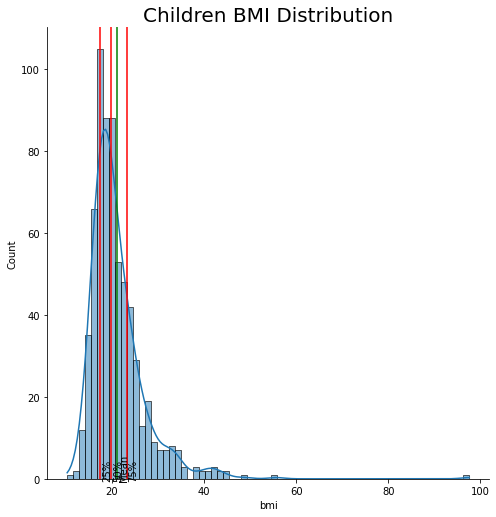

In [ ]:
plot_continuous_variable_distribution(children_only_df, children_only_df.bmi, "bmi", "Children BMI Distribution")

As expected, the whole distribution of bmi for children lays to the left, having in general smaller values for bmi than the values that we have for adults.

In [ ]:
children_only_df[children_only_df.stroke == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1


From all the 659 children in our dataset, only one had a stroke, so the ratio of children that had a stroke is going to be very close to zero, no matter the bmi.

#### Smoking Status

This feature shows whether a person


*   smokes
*   formerly smoked
*   never smoked
*   their smoking status is unknown



In [ ]:
smoking_value_counts = stroke_df.smoking_status.value_counts()
smoking_value_counts

never smoked       1501
Unknown            1247
formerly smoked     714
smokes              626
Name: smoking_status, dtype: int64

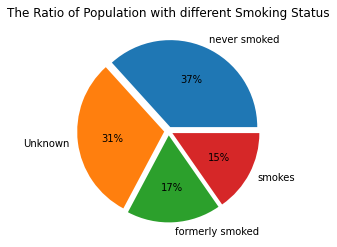

In [ ]:
explode = [0.05] * smoking_value_counts.count()
plt.pie(smoking_value_counts.array, labels=smoking_value_counts.index, autopct = '%0.0f%%', explode = explode)
plt.title("The Ratio of Population with different Smoking Status")
plt.show()

We can see that 31% of the data is missing. We can't drop 30% of the data, so we should replace the 'Unknown' values somehow.

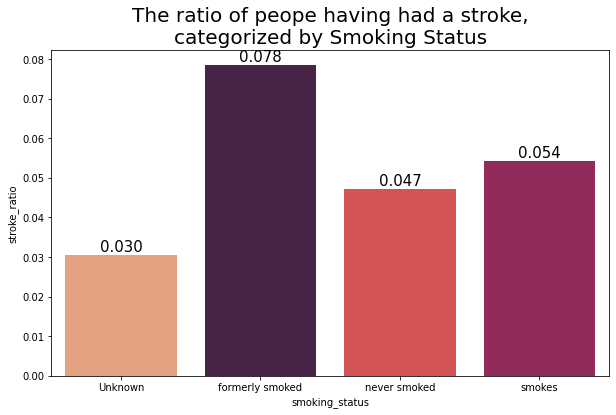

In [ ]:
plot_categorical_variable_stroke_ratio(stroke_df, "smoking_status", "The ratio of peope having had a stroke,\ncategorized by Smoking Status", 3)

Unexpectedly, the ratio of people who had a stroke is higher among former smokers than among current smokers. 

This may be explained by the facts that:


*   those who have formerly smoked may be older
*   many of those who are smoking now may have smoked for less time




### The label: Stroke

The most imporant part is knowing the number of people that had stroke in our dataset, since this is what we are trying to predict.

In [ ]:
stroke_value_counts = stroke_df.stroke.value_counts()
stroke_value_counts

0    3889
1     199
Name: stroke, dtype: int64

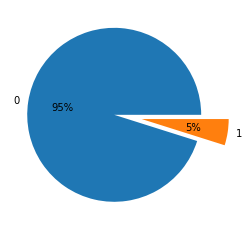

In [ ]:
explode = [0.02,0.3]
plt.pie(stroke_value_counts.array, labels=stroke_value_counts.index, autopct = '%0.0f%%', explode = explode)
plt.show()

Only 5% of people in our dataset have had a stroke. 

## Correlations


#### Helper functions

In [ ]:
def subplots_for_continuous_variable_stroke_ratio(df, var_name, no_quantiles, axes, title, xticks_rotation=70, nr_bar_decimals=2, nr_tick_decimals = 2):
  stroke_df_group = df.copy()
  stroke_df_group[var_name+"_group"] = pd.qcut(stroke_df_group[var_name], q=no_quantiles)
  stroke_ratio_per_var_group = stroke_df_group.groupby([var_name+"_group"]).apply(lambda age_group: age_group["stroke"].sum() / age_group["stroke"].count())
  pal = sns.color_palette("rocket", len(stroke_ratio_per_var_group))
  rank = stroke_ratio_per_var_group.argsort().argsort() 
  plots = sns.barplot(x = stroke_ratio_per_var_group.index, y = stroke_ratio_per_var_group.values, ax = axes, palette = np.array(pal[::-1])[rank])

  # Iterating over the bars one-by-one to add annotations
  for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.{0}f'.format(nr_bar_decimals)),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
      
  xlabels = stroke_ratio_per_var_group.index.map(lambda interval : "({left:.{nr_dec}f}, {right:.{nr_dec}f}".format(nr_dec = nr_tick_decimals, left = interval.left, right = interval.right))
  axes.set_xticklabels(xlabels, rotation = xticks_rotation)
  axes.set_title(title)



#### Computing and Analysing Correlations

Since we have quite a lot of categorical, and more than that, nominal variables, Pandas's `corr()` function for computing correlations doesn't seem well-suited for our use case, because it deals with numerical variables only. 

To overcome this limitation, we'll use Dython's `associations()` function, which can treat correlations between any variable types ([source](http://shakedzy.xyz/dython/modules/nominal/))

*   **numerical - numerical correlations** are computed based on **Pearson's coefficient**. This measures the strength of a linear relationship between the two variables. Range: [-1, 1]. Further details are not discussed, as Pearson's coefficient is assumed to be known by the reader.

*   **nominal - nominal correlations** are computed based on **Cramer's V**, a generalized Phi's Coefficient. Range: [-1, 1]. 

     * *Phi's Coefficient*: also known as Matthews correlation coefficient, is a measure of association between two binary variables. It is in fact a special case of Pearson's coefficient (Pearson's coefficient calculated for 2 binary variables will result in Phi's coefficient).

      [source](http://www.pmean.com/definitions/phi.htm)

      Given the distribution of two binary variables X and Y:
      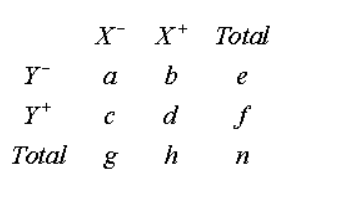

    Phi's coefficient is computed as 
  
    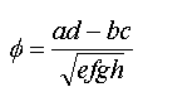

     Thus, we can say that based on Phi's Coefficient, X and Y are positively associated if most of the entries fall on the main diagonal (resulting in a coefficient > 0, and > 0.6 for a strong positive association), and negatively associated if they fall outside the diagonal (resulting in a coefficient < 0, and < -0.6 for a strong negative association)

    * *Cramer's V* is a generalization of Phi's coefficient, in that it works not only for binary but also for multi-valued nominal variables. Differently from Pearon's and Phi's coefficient, it's range is [0, 1] only. 

      [source](https://www.spss-tutorials.com/cramers-v-what-and-why/)

    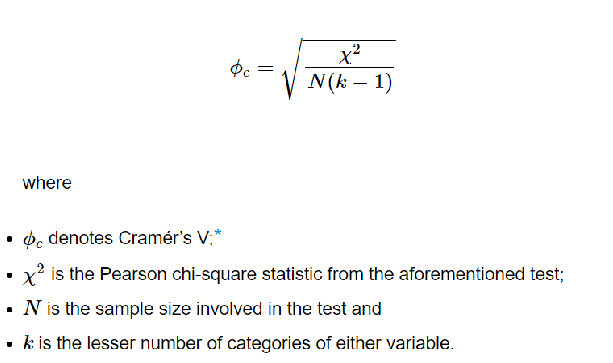

     Interpretation: based on [IBM's guideline](https://www.jmp.com/en_be/statistics-knowledge-portal/chi-square-test.html), 
      *    V < 0.2 is considered to show a weak association
      *    V in [0.2, 0.6] is considered a moderate association
      *    V > 0.6 is considered a strong association

*   **nominal - numerical correlations** are computed based on **Correlation Ratios**, which is a measure of the relationship between the statistical dispersion in the individual categories of the nominal variable and the statistical dispersion in the entire population. Similarly to Cramer's V, it's range is [0, 1].

    [source](https://en.wikipedia.org/wiki/Correlation_ratio)

    It's square can be computed as 
    
    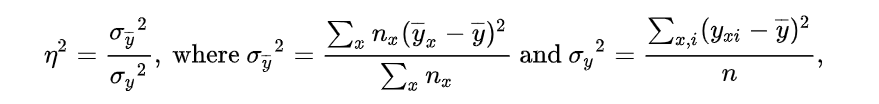

    which represents the variance of the category means divided by the variance of all samples (x denotes a category, y an observation).

    Interpretation: 

      *    eta close to 1 means that the overall dispersion is mostly due to the dispersion between categories. Marks a strong association.
      *    eta close to 0 means that the overall dispersion is mostly due to the dispersion within the individual categories

In [ ]:
pip install dython

In [ ]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from dython.nominal import cluster_correlations
categorical_features=identify_nominal_columns(stroke_df)

##### Correlations between all features

<AxesSubplot:>

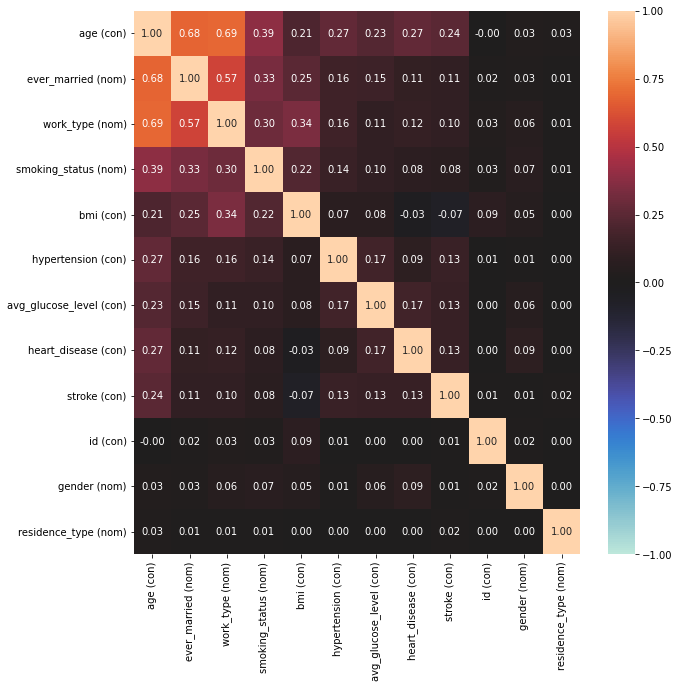

In [ ]:
correlations = associations(stroke_df, compute_only=True, figsize=(10, 10), mark_columns=True)['corr']
correlations, _ = cluster_correlations(correlations)
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, cmap="icefire", fmt=".2f")

##### Correlations with the label


In [ ]:
correlations["stroke (con)"].sort_values(ascending = False)

stroke (con)               1.000000
age (con)                  0.243404
hypertension (con)         0.133109
heart_disease (con)        0.126883
avg_glucose_level (con)    0.125328
ever_married (nom)         0.106979
work_type (nom)            0.103371
smoking_status (nom)       0.075112
residence_type (nom)       0.016559
id (con)                   0.013915
gender (nom)               0.011224
bmi (con)                 -0.065792
Name: stroke (con), dtype: float64

##### Observations

**Correlations with the label (stroke)**

From the heatmap we can get the features that are showing some corellation with stroke (considered the values > 0.1)
*   age
*   hypertension
*   heart_disease
*   ever_married
*   avg_glucose_level
*   ever_married
*   work_type

However, based on the above formulas, actually none of these correlations is strong enough to be a promision feature for prediction on its own. 

Moreover, the variables that have a correlation < 0.1 with the stroke (smoking status, residence type, gender and bmi) seem absolutely irrelevant for the predictive model, assuming that the model is based on a linear approximation function (because correlations also show linear relationships). 

However, if we use a more complex ML model for prediction, that can combine features, than these seemingly uncorrelated features may still be relevant. 

1. Think about the smoking_status for example. We have shown in the 'Individual Feature Analysis' section, that the ratio of those who had a stroke is almost twice as high among former smokers than among non-smokers. This is a condition that a Linear Classifier cannot represent, but a Decision Tree may easily learn. 

2. Similarly, for BMI we have seen that severely obese people are almost twice as likely to suffer a stroke than the underwight ones. Such conditions could we exploited in a prediction.

The features residence_type and gender have shown minimal correlation with the label and even the individual feature analysis proved them to be almost independent of the stroke label. Thus, we may consider dropping these features entirely, if we face limitations in the computational resources avaiable for training our model and would need to simplify the model somehow. 

**Correlations between the features**

Additionaly, we can observe some correlations between the features: work type, age and ever_married seem significantly correlated between each other, and some correlation with BMI can also be observed. 

While we could consider performing a dimensionality reduction to drop some of these features, assuming that using only one of them would aready offer enough information, in practice we should try to understand what happens under the hood, why these variables are correlated.

If we check the 'Individual Feature Analysis' section again, we can easily see that work_type includes a separate category for children, and also, children can never be married. Thus, all the children are likely to have a similar age and the same work_type and marital status, which is already enough to produce some level of correlation, but is not significant when it comes to adults (it is true though, that older adults are even more likely to have been married at least once in their lifetime). In fact, we would expect the model to treat children separately (intuitively, children rarely have strokes, unless they have another illness), and consider the maritas status and work type for adults only.

#### A deeper dive into relevant correlations

##### Scatter-matrix 

Let's see the corelations that we have in more detail using a scatter matrix.

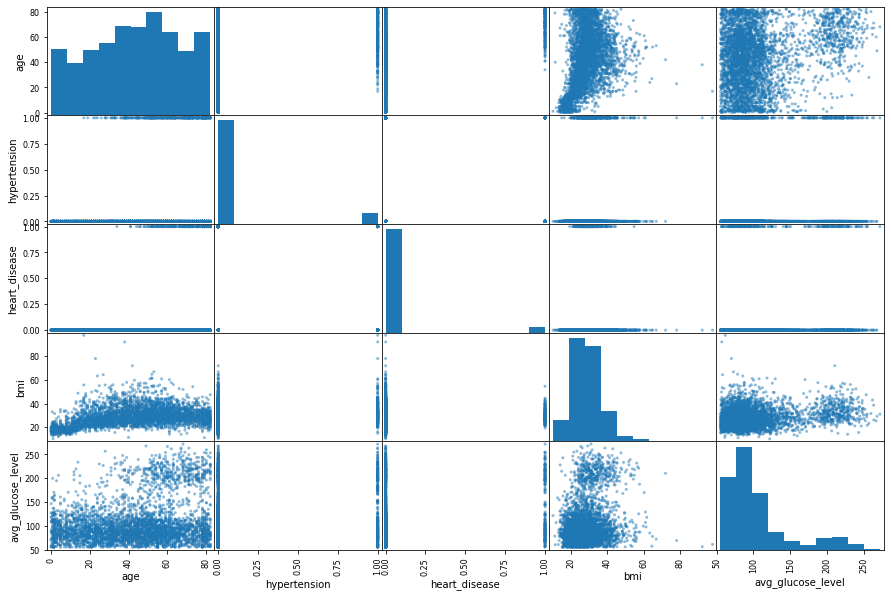

In [ ]:
attributes = ["age", "hypertension", "heart_disease", "bmi", "avg_glucose_level"]
scatter_matrix(stroke_df[attributes], figsize=(15,10))
plt.show()

The above plot shows all the possible corellations between the selected attributes for analysis. Let's take the most important scatter plots and discuss them in more detail.

In [ ]:
def plot_scatter_stroke(hasstroke_df, nostroke_df, var1_name, var2_name):
    plt.scatter(hasstroke_df[var1_name], hasstroke_df[var2_name], c="r", label='stroke')
    plt.scatter(nostroke_df[var1_name], nostroke_df[var2_name], c="g", alpha=0.1, label = 'no stroke')
    plt.xlabel(var1_name)
    plt.ylabel(var2_name)
    plt.legend()

In [ ]:
hasstroke_df = stroke_df[stroke_df.stroke == 1]
nostroke_df = stroke_df[stroke_df.stroke == 0]

###### Age and avg_glucose_level

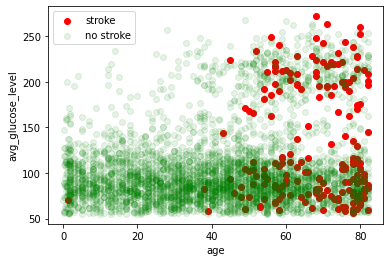

In [ ]:
plot_scatter_stroke(hasstroke_df, nostroke_df, "age", "avg_glucose_level")

The above plot shows the corellation between age, average glucose level and stroke. We have seen at data visualization that average glucose level plot has two local maximum points (one between the values [75 - 120] and another onee between [190 - 250]). But it seems that from the above plot most people having a higher glucose level (190 - 250) are elderly. Those high glucose levels might indicate diabetes, and diabetes (especially type 2 diabetes) is more common for elderly people.
This plot also shows how stroke is more common for elderly people (above 40 years old), and that those having an age less than 40 are safe even if they have a high average glucose level.

###### BMI and avg_glucose_level

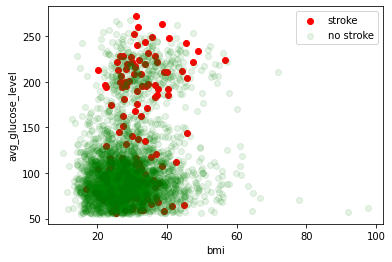

In [ ]:
plot_scatter_stroke(hasstroke_df, nostroke_df, "bmi", "avg_glucose_level")

The above plot might indicate that an important part of people having a higher glucose level, that might have diabetes, tend to have a bmi of around 30, which is overweight to moderate obesity. We don't really have a high average glucose level for people that are underweight or have a normal bmi. In this plot stroke doesn't seem to have a very strong correlation with neither the bmi or the average glucose level.

###### Age and BMI

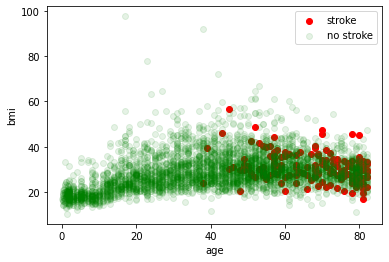

In [ ]:
plot_scatter_stroke(hasstroke_df, nostroke_df, "age", "bmi")

Another correlation that we knew from the beggining, bmi is corellated with age. We can see on the above plot that children have a lower bmi, and that bmi grows as we get older. Interestingly, we dont have strokes at all happening for a bmi higher than 30 and age less then 40, meaning that even if some young people suffer from obesity even a very severe one, they aren't at a high risk for having a stroke.

##### Other relations between features 

###### Work Type and Marital Status

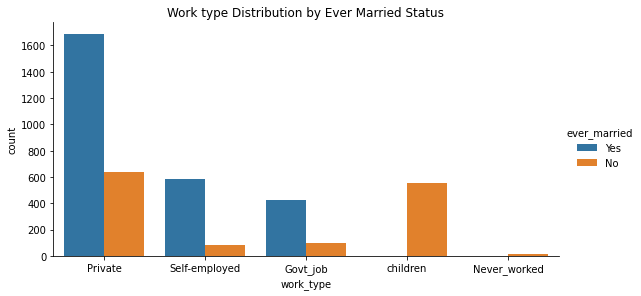

In [ ]:
sns.catplot(x='work_type', hue="ever_married", kind="count", data=stroke_df, height=4, 
    aspect=2)
plt.title("Work type Distribution by Ever Married Status")
plt.show()

From the above plot, we can say that usually if you have a job chances are that you are married. 

There might be a correlation between worktype, and being married. Self-employed people are more likely to be married than those working in the private sector, according to some studies. 

But, the most important factor in the correlation seems to come from the fact that chidren (those that are not working) are not married.

###### Age and Marital Status

Text(0.5, 1.0, 'Age Distribution by Marital Status')

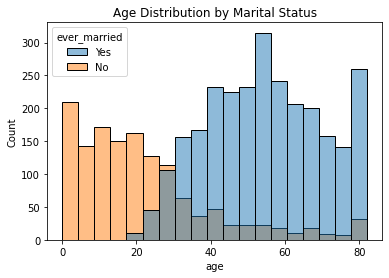

In [ ]:
sns.histplot(data=stroke_df, x="age", hue="ever_married")
plt.title("Age Distribution by Marital Status")

This plot confirms our previous assumption that the correlation betwen age and marital status is caused by children not being married.

###### Age, Gender and Stroke

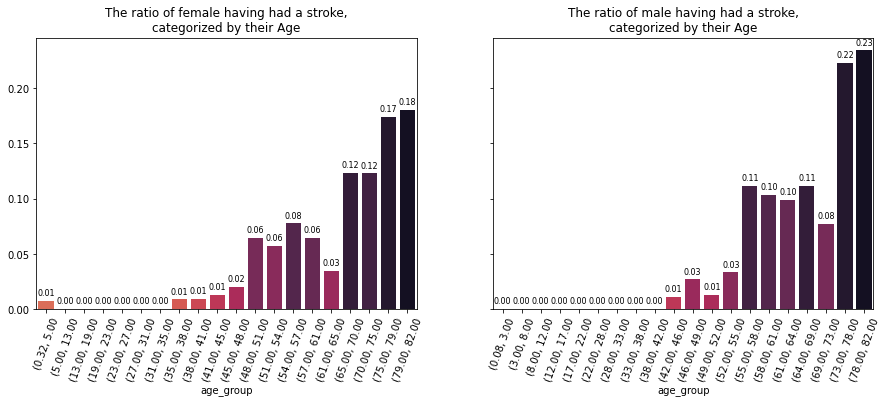

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
female_only_df = stroke_df.loc[stroke_df['gender']=='Female']
male_only_df = stroke_df.loc[stroke_df['gender']=='Male']
subplots_for_continuous_variable_stroke_ratio(female_only_df, "age", 20, axes[0], "The ratio of female having had a stroke,\ncategorized by their Age")
subplots_for_continuous_variable_stroke_ratio(male_only_df, "age", 20, axes[1], "The ratio of male having had a stroke,\ncategorized by their Age")


Women seem to start earlier than men to be predisposed for stroke, that is around 35 years old, compared to 42 years old. But overall, men seem to have a higher predisposition to having a stroke.

###### Work Type and BMI

<AxesSubplot:xlabel='bmi', ylabel='work_type'>

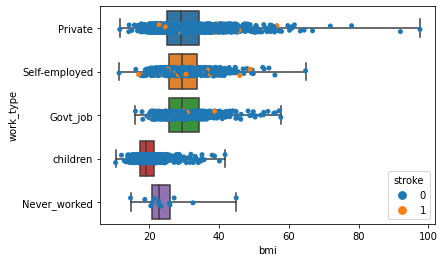

In [ ]:
sns.boxplot(x="bmi", y="work_type", data=stroke_df, whis=np.inf)
sns.stripplot(x="bmi", y="work_type", hue="stroke", data=stroke_df)

This plot shows that children and people who have never worked have a significanty lower median BMI, but this may be simply caused by the fact that they are younger.

Moreover, we can observe that range of the BMIs in the 'private' work type category is larger, significantly more people seem to be both underweight and overweight. However, this may be explained with the fact that we have simply more entries in this category. In fact, the boxes show that the median, 1st and 3rd quartiles for the 'Private', 'Self-employed' and 'Govt_job' categories are really close to each other, thus, if one has a job, then the type of the job does not seem to be a good predictor of their BMI.

## Data Preprocessing

### Finding the right cleaning approaches

Copy the dataset, to avoid modifying the original one.

In [ ]:
stroke_df_copy = stroke_df.copy()

Let's check where we have NaN values first.

In [ ]:
stroke_df_copy.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  170
smoking_status         0
stroke                 0
dtype: int64

#### Helper functions

In [ ]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [ ]:
def get_mean_based_on_age(df):
  children_median = df[df['age'] < 18]['bmi'].median()
  adults_median = df[df['age'] >= 18]['bmi'].median()
  return children_median, adults_median

In [ ]:
def clean_bmi(df, children_median, adults_median):
    df_plus = df.copy()
    
    df_plus['bmi'] = df_plus.apply(
        lambda row: children_median if ((np.isnan(row['bmi'])) & (row['age'] < 18)) else row['bmi'],
        axis=1
    )
    df_plus['bmi'] = df_plus.apply(
        lambda row: adults_median if ((np.isnan(row['bmi'])) & (row['age'] >= 18)) else row['bmi'],
        axis=1
    )
    return df_plus

The NaN values appear only for bmi, but it is not the only feature in our dataset that has to be cleaned.

#### Work Type

For work types, we have identified never_worked to have only 13 value counts. Some of the people that have never_worked as work type, are children. We should replace their work_status to children. 

In [ ]:
stroke_df_copy['work_type'] = stroke_df_copy.apply(
    lambda row: "children" if ((row['work_type'] == 'Never_worked') & (row['age'] < 18)) else row['work_type'],
    axis=1
)
new_work_type_value_counts = stroke_df_copy.work_type.value_counts()
new_work_type_value_counts

Private          2331
Self-employed     667
children          563
Govt_job          522
Never_worked        4
Name: work_type, dtype: int64

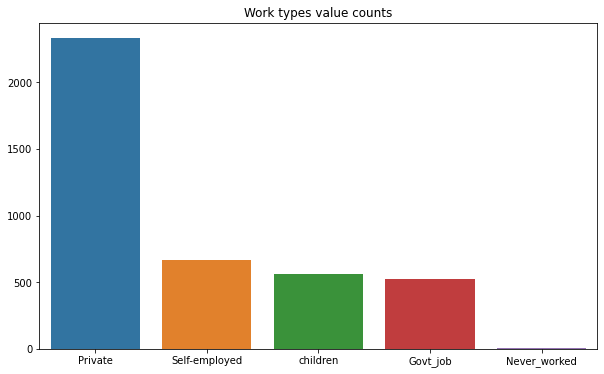

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Work types value counts")
sns.barplot(x=new_work_type_value_counts.index, y=new_work_type_value_counts.array)
plt.show()

#### Body Mass Index

##### Handling Missing Values

To replace the missing values there are several approaches:


1.   Drop columns with missing value i.e. bmi
2.   Use a SimpleImputer with a median strategy to replace them
3.   Use a SimpleImputer with a median strategy to replace them, and add a separate feature to flag entries which had a missing bmi value
4.   Replace with median based on age, as we expect a different bmi for adults than for children
5.    USe a SimpleImputer with mean strategy

To test which approach is better we will try to predict on the changed dataset for every approach, and measure which one give us a smaller mean abolute error.



In [ ]:
bmi_stroke_df = stroke_df_copy.copy()
y = bmi_stroke_df.stroke
X = bmi_stroke_df.drop(['stroke', 'id'], axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked
3744,Male,15.0,0,0,No,Private,Rural,122.25,21.0,never smoked
4183,Female,67.0,0,0,Yes,Self-employed,Rural,110.42,24.9,never smoked
3409,Male,44.0,0,0,Yes,Private,Urban,65.41,24.8,smokes
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=0)

X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
2480,Male,14.0,0,0,No,children,Rural,112.22,26.9,Unknown
1933,Female,70.0,0,0,Yes,Private,Urban,91.25,36.0,Unknown
4771,Male,17.0,0,0,No,Self-employed,Urban,113.85,22.9,Unknown
323,Male,53.0,0,0,Yes,Private,Rural,90.12,35.4,Unknown
4382,Female,16.0,0,0,No,Private,Rural,106.80,20.8,never smoked


In [ ]:
# handling categorical variables

# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

# apply one-hot encoder on them
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_transformed_train = OH_encoder.fit_transform(X_train[object_cols])
OH_transformed_valid = OH_encoder.transform(X_valid[object_cols])

column_names = OH_encoder.get_feature_names_out(object_cols)

OH_cols_train = pd.DataFrame(OH_transformed_train, columns=column_names)
OH_cols_valid = pd.DataFrame(OH_transformed_valid, columns=column_names)

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

###### Approach 1

Drop bmi column as it has missing values.

In [ ]:
reduced_X_train = X_train.drop(['bmi'], axis=1)
reduced_X_valid = X_valid.drop(['bmi'], axis=1)

print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

0.05644171779141104


This is the mean absolute error that we got. Let's see if we can improve it.

###### Approach 2

In [ ]:
simple_imputer = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(simple_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(simple_imputer.transform(X_valid))

#imputer deleted the column names so we have to add them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

0.051533742331288344


The error is much smaller now. However, we could also try some alternatives to this.

###### Approach 3

Let's add a new column that will keep the record of whether or not the bmi was missing before we replaced it with the median.

In [ ]:
simple_imputer = SimpleImputer(strategy='median')

X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

X_train_plus['bmi_was_missing'] = X_train_plus['bmi'].isnull()
X_valid_plus['bmi_was_missing'] = X_valid_plus['bmi'].isnull()

imputed_X_train_plus = pd.DataFrame(simple_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(simple_imputer.transform(X_valid_plus))

#imputer deleted the column names so we have to add them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

0.05644171779141104


The error got bigger after this change. That might happen due to overfitting. The model is now considering the bmi_was_missing when its making the prediction, but that shouldn't be a clue to whether or not a person will have a stroke: it should only help to model to consider the bmi with a smaller weight if it was originally missing.

###### Approach 4

Another aproach would be to replace with median according to age, as the bmi for adults is different that the bmi for children. Thus adults will get a median for adults, and children will have a median for children.

In [ ]:
children_median, adults_median = get_mean_based_on_age(X_train)
X_train_plus = clean_bmi(X_train, children_median, adults_median)
X_valid_plus = clean_bmi(X_valid, children_median, adults_median)
print(score_dataset(X_train_plus, X_valid_plus, y_train, y_valid))

0.051533742331288344


It seems that the mean absolute error is now the same we got in approach 2, so we should keep approach 2 as the final approach since it is easier to implement and integrate in our pipeline.

###### Approach 5

In [ ]:
simple_imputer = SimpleImputer(strategy='mean')
imputed_X_train = pd.DataFrame(simple_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(simple_imputer.transform(X_valid))

#imputer deleted the column names so we have to add them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

0.053987730061349694


While this MAE is close to the one obtained with the median-based strategy, it still seems that Approach 2 is the most beneficial one.

##### Replacing the missing values

In [ ]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(stroke_df_copy[['bmi']])
stroke_df_copy['bmi'] = imputer.transform(stroke_df_copy[['bmi']])
stroke_df_copy.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
845,25283,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0
3744,43734,Male,15.0,0,0,No,Private,Rural,122.25,21.0,never smoked,0
4183,47113,Female,67.0,0,0,Yes,Self-employed,Rural,110.42,24.9,never smoked,0
3409,56996,Male,44.0,0,0,Yes,Private,Urban,65.41,24.8,smokes,0
284,26325,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0


In [ ]:
stroke_df_copy.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Indeed, we don't have null values anymore.

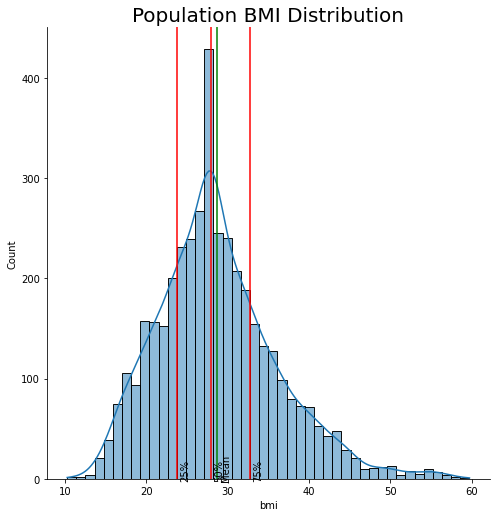

In [ ]:
plot_continuous_variable_distribution(stroke_df_copy, stroke_df_copy.bmi, "bmi", "Population BMI Distribution")

Now we have more people with a bmi closer to 30, falling in the overweight category.

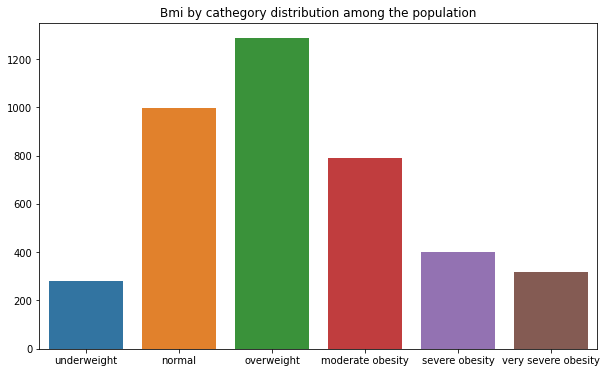

In [ ]:
new_stroke_df_with_bmi_categ = stroke_df_copy.copy()
new_stroke_df_with_bmi_categ.bmi = pd.cut(new_stroke_df_with_bmi_categ.bmi,
                                      bins=[0, 18.5, 25, 30, 35, 40, 100],
                                      labels=bmi_categ_list)

bmi_categ_value_counts = new_stroke_df_with_bmi_categ.bmi.value_counts()

plt.figure(figsize=(10,6))
plt.title("Bmi by cathegory distribution among the population")
sns.barplot(x=bmi_categ_value_counts.index, y=bmi_categ_value_counts.array, order=bmi_categ_list)
plt.show()

Also the ratio of people that had a stroke has increased for the overweight category, since some people that had a missing bmi also had a stroke.

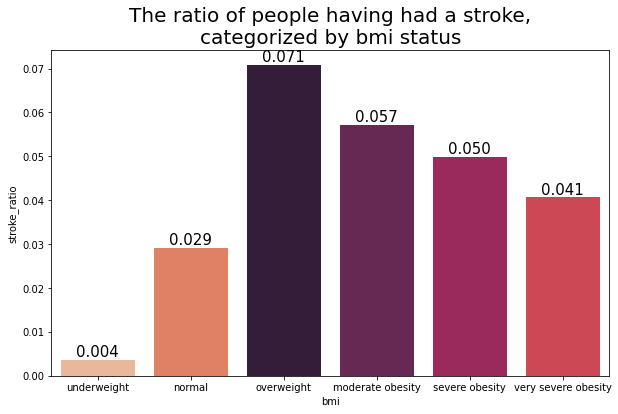

In [ ]:
plot_categorical_variable_stroke_ratio(new_stroke_df_with_bmi_categ, "bmi", 
                                       "The ratio of people having had a stroke,\ncategorized by bmi status",3)

#### Smoking Status

###### The smoking status of children and teenagers




Other studies have shown that the earliest age when children start smoking is ~12 years old.

Resources:


*   [study on researchgate](https://www.researchgate.net/figure/Smoking-prevalence-by-gender-and-age-among-12-to-17-year-old-adolescents-in-Germany_fig2_251235344)
*   [CDC study](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/youth_data/tobacco_use/index.htm)
*   [statcan.gc.ca](https://www150.statcan.gc.ca/n1/pub/82-625-x/2020001/article/00003-eng.htm)



In [ ]:
children_df = stroke_df_copy[stroke_df_copy.age < 18].copy()
children_df.age = children_df.age.round()
children_age_smoking_categories = children_df.groupby(['age', 'smoking_status'])
children_age_smoking_categories_df = children_age_smoking_categories.size().reset_index(name='counts')
children_age_smoking_categories_df

,age,smoking_status,counts
0,0.0,Unknown,16
1,1.0,Unknown,49
2,2.0,Unknown,77
3,3.0,Unknown,39
4,4.0,Unknown,28
5,5.0,Unknown,52
6,6.0,Unknown,21
7,7.0,Unknown,24
8,8.0,Unknown,45
9,9.0,Unknown,33


Text(0.5, 1.0, 'The smoking status of underage people, by age group')

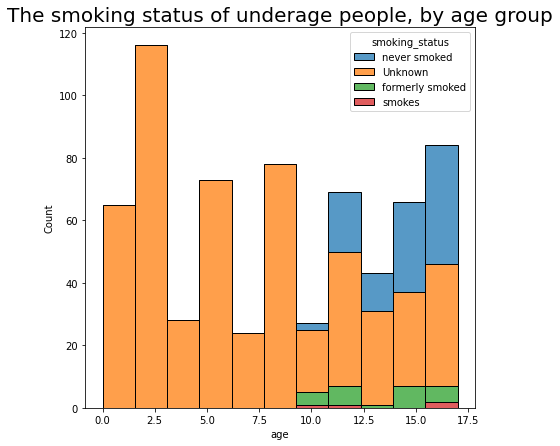

In [ ]:
fig, ax = plt.subplots(figsize=def_fig_size)
sns.histplot(data=children_df, x="age", hue="smoking_status", ax=ax, multiple="stack")
plt.title("The smoking status of underage people, by age group", size = def_title_size)

The above table summarizes the number of childrean in each age + smoking_status group.

Observations:


*   all children below the age of 10 are reported with the status 'Unknown'. It seems safe to assume that these children in fact never smoked, so we cna replace their status with 'never smoked'
*   the youngest smokers that appear are 10 years old


In [ ]:
# replace the smoking status of <10 years old children with 'never smoked'
stroke_df_copy.smoking_status = np.where(np.logical_and(stroke_df_copy.age < 10, stroke_df_copy.smoking_status == 'Unknown'), "never smoked", stroke_df_copy.smoking_status)

In [ ]:
# New plots after the replacement
smoking_value_counts = stroke_df_copy.smoking_status.value_counts()
smoking_value_counts

never smoked       1880
Unknown             859
formerly smoked     713
smokes              622
Name: smoking_status, dtype: int64

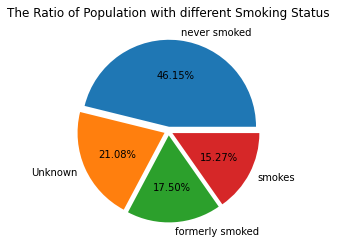

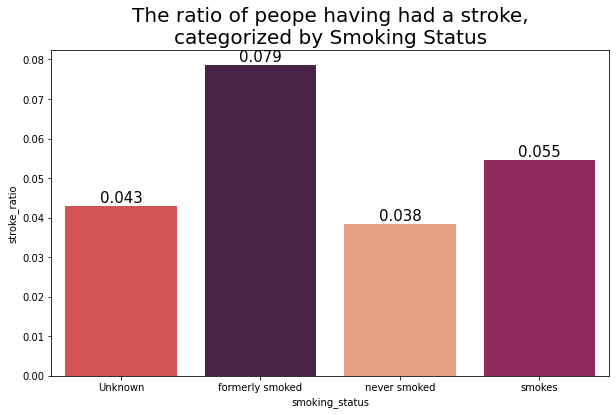

In [ ]:
explode = [0.05] * smoking_value_counts.count()
plt.pie(smoking_value_counts.array, labels=smoking_value_counts.index, autopct = '%0.2f%%', explode = explode)
plt.title("The Ratio of Population with different Smoking Status")
plt.show()
plot_categorical_variable_stroke_ratio(stroke_df_copy, "smoking_status", "The ratio of peope having had a stroke,\ncategorized by Smoking Status", 3)

###### Handling 'Unknown' values

Still, **21.09% of the entries have their smoking_status 'Unknown'**. We considered the following **options for replacing them**:


1.   replace with the most frequent value, i.e. 'never smoked'
2.   replace with a random value (possibly with the previous/next known value in the dataframe)
3.   build a model to predict the smoking_status of the entries with missing data

It is clear, that option 1 and 2 are "blind replacements". We discarded the idea of applying any of these to options because:


*   based on the above plot, showing the ratio of people who suffered a stroke in each smoking_status category, it seems like the smoking_status has a significant impact in the tendency to have a stroke
*   the entries with 'Unknown' smoking status represent >20%, a huge portion of the data, 

so replacing the 'Unknown' values with incorrect values may introduce a significant error in our future predictions.

So, let's try to build a cost-efficient, simple RandomForestClassifier for option 3 and see how well it works. If it works with a high f1 score, we can consider replacing the 'Unknwon' values with the predictions of the DecisionTreeClassifier. Otherwise, we should just work with 'Unknown' as a separate category.




In [ ]:
smoke_df = stroke_df_copy.copy()
smoke_df = smoke_df[smoke_df.smoking_status != 'Unknown']
X = smoke_df[smoke_df.columns.drop(['smoking_status', 'stroke', 'id'])].copy()
y = smoke_df.smoking_status
smoke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
845,25283,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0
3744,43734,Male,15.0,0,0,No,Private,Rural,122.25,21.0,never smoked,0
4183,47113,Female,67.0,0,0,Yes,Self-employed,Rural,110.42,24.9,never smoked,0
3409,56996,Male,44.0,0,0,Yes,Private,Urban,65.41,24.8,smokes,0
4796,67159,Male,73.0,1,0,No,Govt_job,Urban,71.29,37.7,never smoked,0


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# handling categorical variables

# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

# apply one-hot encoder on them
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_transformed_train = OH_encoder.fit_transform(X_train[object_cols])
OH_transformed_valid = OH_encoder.transform(X_valid[object_cols])

column_names = OH_encoder.get_feature_names_out(object_cols)

OH_cols_train = pd.DataFrame(OH_transformed_train, columns=column_names)
OH_cols_valid = pd.DataFrame(OH_transformed_valid, columns=column_names)

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban
4432,13.0,0,0,146.10,22.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4094,82.0,0,0,111.81,19.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4010,30.0,0,0,76.70,24.2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3203,46.0,0,0,66.59,36.7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1317,0.8,0,0,98.67,17.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,3.0,0,0,101.30,24.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3133,16.0,0,0,87.16,28.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2312,76.0,0,0,110.07,31.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3240,7.0,0,0,73.27,19.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
for complexity in range(5,156,30):
  print("-------------------------------------------- Tree with max leav nodes = ", complexity)
  dt_classifier = RandomForestClassifier(criterion = "entropy", max_leaf_nodes = complexity)
  dt_classifier.fit(X_train, y_train)
  print("Accuracy: ", dt_classifier.score(X_valid, y_valid))
  y_valid_pred = dt_classifier.predict(X_valid)
  print(classification_report(y_valid, y_valid_pred))

-------------------------------------------- Tree with max leav nodes =  5
Accuracy:  0.5746268656716418
                 precision    recall  f1-score   support

formerly smoked       0.00      0.00      0.00       190
   never smoked       0.57      1.00      0.73       462
         smokes       0.00      0.00      0.00       152

       accuracy                           0.57       804
      macro avg       0.19      0.33      0.24       804
   weighted avg       0.33      0.57      0.42       804

-------------------------------------------- Tree with max leav nodes =  35


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.5808457711442786
                 precision    recall  f1-score   support

formerly smoked       0.58      0.04      0.07       190
   never smoked       0.58      1.00      0.73       462
         smokes       0.00      0.00      0.00       152

       accuracy                           0.58       804
      macro avg       0.39      0.34      0.27       804
   weighted avg       0.47      0.58      0.44       804

-------------------------------------------- Tree with max leav nodes =  65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.5833333333333334
                 precision    recall  f1-score   support

formerly smoked       0.59      0.05      0.10       190
   never smoked       0.58      0.99      0.74       462
         smokes       0.00      0.00      0.00       152

       accuracy                           0.58       804
      macro avg       0.39      0.35      0.28       804
   weighted avg       0.47      0.58      0.45       804

-------------------------------------------- Tree with max leav nodes =  95
Accuracy:  0.5796019900497512
                 precision    recall  f1-score   support

formerly smoked       0.45      0.07      0.12       190
   never smoked       0.58      0.98      0.73       462
         smokes       0.00      0.00      0.00       152

       accuracy                           0.58       804
      macro avg       0.34      0.35      0.28       804
   weighted avg       0.44      0.58      0.45       804

-------------------------------------------- Tree with max l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.5746268656716418
                 precision    recall  f1-score   support

formerly smoked       0.41      0.07      0.12       190
   never smoked       0.59      0.97      0.73       462
         smokes       0.00      0.00      0.00       152

       accuracy                           0.57       804
      macro avg       0.33      0.35      0.29       804
   weighted avg       0.43      0.57      0.45       804

-------------------------------------------- Tree with max leav nodes =  155
Accuracy:  0.5746268656716418
                 precision    recall  f1-score   support

formerly smoked       0.38      0.08      0.13       190
   never smoked       0.59      0.97      0.73       462
         smokes       0.17      0.01      0.01       152

       accuracy                           0.57       804
      macro avg       0.38      0.35      0.29       804
   weighted avg       0.46      0.57      0.45       804



As we can see, the weighted F1-score barely reaches 0.5, so a simple RandomForestClassifier is not enough to accurately predict the smoking status of people. 

This is not a surprising finding actually: other than age, no feature allows us to make an assumption about the lifestyle of each person in the dataset, and we have already exploited the fact that small children are most probably non-smokers.

This makes it useless to try more complex and computationally more expensive ML models for predicting the smoking status of people.

**As a final conclusion, the 'Unknown' values will be treated as a 4. smoking_status category in the analysis.**

#### ID

Last but not least, we should drop the id column as we dont need it.

In [ ]:
stroke_df_copy.drop(['id'], axis=1, inplace=True)
stroke_df_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,0
3744,Male,15.0,0,0,No,Private,Rural,122.25,21.0,never smoked,0
4183,Female,67.0,0,0,Yes,Self-employed,Rural,110.42,24.9,never smoked,0
3409,Male,44.0,0,0,Yes,Private,Urban,65.41,24.8,smokes,0
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0


This is the final dataset that we achived after performing data cleaning.

### Building a Preprocessing Pipeline

The pipeline performs cleaning based on the approaches found above, and, additionaly, encodes the categorical variables.

#### Dropping irrelevant columns

In [300]:
class ColumnDropperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def fit(self, X, y=None):
        return self 

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

#### Categorical variables

In [301]:
bin_categorical_cols = ['ever_married', 'residence_type', 'gender']
larger_categorical_cols = [cname for cname in stroke_df.columns if stroke_df[cname].dtype == "object" and cname not in bin_categorical_cols]
larger_categorical_cols

['work_type', 'smoking_status']

Based on the values of these variables, we can see that 'gender', 'ever_married' and 'residence_type' have just two possible values, so it's safe to assume an ordering between them, and assign 1 to one of the values and 0 to the other. This can be easily done using an OrdinalEncoder.

The other variables, 'work_type' and 'smoking_status' have multiple possible values with no ordering between them so we should apply a OneHotEncoder instead.

In [302]:
cat_var_transformers = [
    ('multi_cat', OneHotEncoder(), larger_categorical_cols),
    ('bin_cat', OrdinalEncoder(), bin_categorical_cols),
]

#### Numerical Variables

We only expect to have missing values in the BMI feature. As discussed above, a SimpleImputer with a median strategy is the most promising for BMI values, and for simplicity, we'll apply the same imputer for the other numerical columns as well.

In [303]:
# Select numerical columns
numerical_cols = [cname for cname in stroke_df.columns if stroke_df[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('stroke')
numerical_cols.remove('id')
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [304]:
num_var_transformers = [
    ('num_var', SimpleImputer(strategy='median'), numerical_cols)
]

#### ColumnTransformer integrating categoric and numeric variables

In [305]:
column_transformer = ColumnTransformer(
    transformers = cat_var_transformers + num_var_transformers,
    remainder = 'passthrough'
)

#### Resetting Feature Names of dataframe after ColumnTransformer

In [306]:
class ColumnTransformerFeatureNameResetter(BaseEstimator, TransformerMixin):
    def __init__(self, renamer_column_transformer, init_df_columns):
        super().__init__()
        self.__renamer_column_transformer = renamer_column_transformer
        self.__init_df_columns = init_df_columns
        self.__columns = None

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):

        df = pd.DataFrame(df)

        df.columns = self.__get_columns_from_transformer(self.__renamer_column_transformer, self.__init_df_columns)

        self.__columns = df.columns

        df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

        return df

    def get_columns(self):
        return self.__columns

    def __get_columns_from_transformer(self, column_transformer, input_colums):    
        """
        source: https://github.com/scikit-learn/scikit-learn/issues/12525#issuecomment-744424900
        """
        col_name = []

        for transformer_in_columns in column_transformer.transformers_[:-1]: #the last transformer is ColumnTransformer's 'remainder'
            raw_col_name = transformer_in_columns[2]
            if isinstance(transformer_in_columns[1],Pipeline): 
                transformer = transformer_in_columns[1].steps[-1][1]
            else:
                transformer = transformer_in_columns[1]
            try:
                names = transformer.get_feature_names_out(raw_col_name)
            except AttributeError: # if no 'get_feature_names' function, use raw column name
                names = raw_col_name
            if isinstance(names,np.ndarray): # eg.
                col_name += names.tolist()
            elif isinstance(names,list):
                col_name += names    
            elif isinstance(names,str):
                col_name.append(names)

        [_, _, reminder_columns] = column_transformer.transformers_[-1]

        for col_idx in reminder_columns:
            col_name.append(col_idx)

        return col_name

#### Custom Transformers

In [307]:
class WorkTypeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):
        df['work_type'] = df.apply(
            lambda row: "children" if ((row['work_type'] == 'Never_worked') & (row['age'] < 18)) else row['work_type'],
            axis=1
        )

        return df

In [308]:
class SmokingStatusTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):
        df.smoking_status = np.where(np.logical_and(df.age < 10, df.smoking_status == 'Unknown'), "never smoked", df.smoking_status)

        return df

#### Scaling Values

It is known that most ML algorithms perform better if the features have similar scales, as it is the case in out dataframe: for example, BMI values have the range [0, 60], whereas avg_glucose_level values are in the interval [50, 270]. 

To overcome this issue, we should scale all the values. Since many of our variables do not follow a normal distribution but are rather skewed (see BMI - right skewed, or avg_glucose_level - doubles peaked), and we have many binary-values nominal variables as well marked with 0 or 1, we should use the MinMaxScaler instead of the StandardScaler.

In [309]:
scaler = StandardScaler()

In [310]:
class ScalerFeatureNameResetter(BaseEstimator, TransformerMixin):
    def __init__(self, renamer_scaler, init_cols):
        super().__init__()
        self.__renamer_scaler = renamer_scaler
        self.__init_cols = init_cols

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):

        df = pd.DataFrame(df)

        df.columns = self.__renamer_scaler.get_feature_names_out(self.__init_cols)
        return df

#### Integrating all steps in a pipeline

In [311]:
processed_columns = X_stroke_tv_df.drop(['id'], axis=1).columns
column_transformer_name_resetter = ColumnTransformerFeatureNameResetter(column_transformer, processed_columns)
processed_columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [312]:
preprocesser_pipeline = Pipeline([
        # ('drop_outliers', FunctionSampler(func=CustomOutlierDropper, validate = False)), 
        ('drop_irrelevant_features', ColumnDropperTransformer("id")),
        ('work_type_replacement_for_children', WorkTypeTransformer()), 
        ('smoking_status_replacement_for_small_children', SmokingStatusTransformer()), 
        ('column_processing', column_transformer),
        ('reset_feature_names', column_transformer_name_resetter),
        ('scaling', scaler),
        ('reset_scaled_feature_names', ScalerFeatureNameResetter(scaler, column_transformer_name_resetter.get_columns()))
])

In [313]:
trans_X_stroke_tv_df = pd.DataFrame(preprocesser_pipeline.fit_transform(X_stroke_tv_df, y_stroke_tv_df))
trans_X_stroke_tv_df

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married,residence_type,gender,age,hypertension,heart_disease,avg_glucose_level,bmi
0,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,-0.460020,1.081064,-0.42523,0.71699,0.987843,-0.840344,0.205661,-0.327962,-0.239061,-0.819973,0.543113
1,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,-0.460020,1.081064,-0.42523,-1.39472,-1.012307,1.187594,-1.254901,-0.327962,-0.239061,0.352075,-1.015569
2,-0.382600,-0.031296,-1.152397,2.264715,-0.399645,-0.517298,-0.460020,1.081064,-0.42523,0.71699,-1.012307,-0.840344,1.046590,-0.327962,-0.239061,0.090662,-0.513184
3,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,-0.460020,-0.925014,2.35167,0.71699,0.987843,1.187594,0.028623,-0.327962,-0.239061,-0.903944,-0.526066
4,2.613698,-0.031296,-1.152397,-0.441557,-0.399645,1.933123,-0.460020,-0.925014,-0.42523,-1.39472,0.987843,1.187594,-1.299160,-0.327962,-0.239061,-0.529834,0.349888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,2.173819,-0.925014,-0.42523,0.71699,0.987843,-0.840344,0.072883,-0.327962,-0.239061,-0.297369,0.800746
4084,-0.382600,-0.031296,-1.152397,-0.441557,2.502219,1.933123,-0.460020,-0.925014,-0.42523,-1.39472,-1.012307,-0.840344,-1.210641,-0.327962,-0.239061,0.158059,-1.208794
4085,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,2.173819,-0.925014,-0.42523,0.71699,-1.012307,-0.840344,0.781034,-0.327962,-0.239061,-0.611373,0.942445
4086,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,1.933123,-0.460020,-0.925014,-0.42523,0.71699,0.987843,1.187594,-0.546750,-0.327962,-0.239061,-0.713022,-0.371486


In [314]:
trans_X_stroke_test_df = pd.DataFrame(preprocesser_pipeline.transform(stroke_test_df))
trans_X_stroke_test_df

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married,residence_type,gender,age,hypertension,heart_disease,avg_glucose_level,bmi
0,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,-0.460020,1.081064,-0.42523,0.71699,-1.012307,1.187594,0.869552,-0.327962,-0.239061,-0.620654,0.762101
1,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,-0.460020,1.081064,-0.42523,0.71699,0.987843,-0.840344,-0.015636,-0.327962,-0.239061,-0.434152,0.568876
2,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,-0.460020,-0.925014,2.35167,-1.39472,0.987843,-0.840344,-0.900825,-0.327962,-0.239061,0.449745,-0.023680
3,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,-0.460020,1.081064,-0.42523,-1.39472,0.987843,-0.840344,-0.989344,-0.327962,-0.239061,2.250687,-0.513184
4,-0.382600,-0.031296,0.867757,-0.441557,-0.399645,-0.517298,2.173819,-0.925014,-0.42523,0.71699,-1.012307,1.187594,1.046590,-0.327962,-0.239061,0.155187,-0.332841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,-0.382600,-0.031296,-1.152397,2.264715,-0.399645,-0.517298,-0.460020,1.081064,-0.42523,-1.39472,0.987843,-0.840344,1.710482,-0.327962,-0.239061,-0.532707,-0.371486
1018,2.613698,-0.031296,-1.152397,-0.441557,-0.399645,-0.517298,-0.460020,1.081064,-0.42523,-1.39472,-1.012307,-0.840344,-0.413971,-0.327962,-0.239061,0.303681,0.530231
1019,2.613698,-0.031296,-1.152397,-0.441557,-0.399645,-0.517298,-0.460020,1.081064,-0.42523,0.71699,0.987843,-0.840344,0.294180,-0.327962,-0.239061,-0.313058,-1.041332
1020,-0.382600,-0.031296,-1.152397,-0.441557,2.502219,-0.517298,-0.460020,1.081064,-0.42523,-1.39472,-1.012307,1.187594,-1.254901,-0.327962,-0.239061,-0.966700,0.440060


## Building a Predictive Model

### Splitting the Features and the Label

In [315]:
X_train = trans_X_stroke_tv_df
y_train = y_stroke_tv_df
X_test = trans_X_stroke_test_df
y_test = stroke_test_df.stroke

In [316]:
X = pd.concat([X_train, X_test], axis = 0)

In [317]:
y = pd.concat([y_train, y_test], axis = 0)

In [318]:
X_train.shape

(4088, 17)

In [319]:
y_train.shape

(4088,)

### Train-Validation Split

Since our dataset is quite small, we should prefer performing a cross validation whenever possible. However, when training a model is computationally expensive, we may use the below train-validation split to evaluate our model.

In [320]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state, stratify=y_train)

### Handling imbalanced data

As we have shown above, only slightly less than 5% of our samples represent people who had a stroke. Such a strong imbalance in the dataset makes it hard for most machine learning algorithms to learn the particularities of the minority class and detect a decision bondary between the classes: it's likely that most models will tend to predict most entries to have a stroke, because this would allow them to gain a ~95% accuracy without any further knowledge.

However, as our goal is exactly that of understanding what contributes to one's increased tendency to get a stroke, we should make sure somehow that the entries with a stroke have a high enough weight in the ML model. 

Collecting more data is not a solution, no only, becaus ewe do not have the time and resources for that, but also because the imbalance is representative for the population: we can never expect that 50% of a randomly sampled population, from any country, has had a stroke (fortunately).

We'll consider multiple approacehs for overcoming this issue:

1. **applying different class weights**
3. **adding synthetic samples to the minority class (stroke=1) + undersampling the majority class**

#### Using class weights

One wasy to overcome the imbalance issue is applying different weights to the classes when training the model: the errors occuring because of mispredicting entries belonging to the minority class will be added to the overall loss with a higher multiplicative factor. Thus, the model will strive more for an accurate prediction of the minority classes as well.

#### SMOTE


One of the possible solutions is simply balancing the dataset by adding sytnhetic entries to the minority class. We'll apply the SMOTE method ("Synthetic Minority Oversampling Technique"), which is based on synthesising new data entries along the lines connecting close real entries of the minority class (in an n-dimensional space, if there are n features).

However, since we would need to synthetically create 94% of the final entries in the minority class, this huge amount of artificial data may cause the model to learn the particularities introduced by the SMOTE method instead of the general characteristics of the class. 

As a compromise, we'll first undersample the majority class (see [this article for an explanation](https://arxiv.org/abs/1106.1813) of why undersampling + SMOTE performs better than plain undersampling), and apply SMOTE for balancing the dataset only afterwards. This way, the amount of artificial entries is somewhat reduced.

In [321]:
pip install imbalanced-learn

In [322]:
y_train1[y_train1==1].shape[0]

159

In [323]:
y_train1[y_train1==0].shape[0]

3111

In [324]:
undersampler = RandomUnderSampler(sampling_strategy={
        0: int(y_train1[y_train1==0].shape[0] / 4),
        1: y_train1[y_train1==1].shape[0]
    }, random_state=random_state)
us_X_train1, us_y_train1 = undersampler.fit_resample(X_train1, y_train1)

In [325]:
oversample = SMOTE()
smote_X_train1, smote_y_train1 = oversample.fit_resample(us_X_train1, us_y_train1)

### Expectations from the Model

Since the model that we build acts as a binary classifier, it it only natural that we rely on the confusion matrix to evaluate our model. 

However, we should decide which confusion-matrix-related metrics is most important for us: **do we care more about precision, i.e. making sure that all people said to have had a stroke by the model indeed had a stroke, or recall, i.e. maximizing the probability that a person who had a stroke is detected by the model as such?** Or maybe should we take both into account, in form of a more complex metrics? It is likely that at some point we'll need to make a compromise, due to the precision-recall tradeoff concept.

In the context of medical analysis, the first intuition may be that the recall should have a higher weight in deciding which model fits best. In general, when it comes to detecting such mortal diseases, **the cost of not detecting someone's tendency to get the disease is likely death**. We generally consider the death of a human being to be a far higher cost compared to the financial costs related to unnecessary medical analysis and preventive treatment. 

There's one mistake in the above train of thought though: note that the goal of our analysis is not that of deciding whether someone needs treatment, surgery, medicines or any other measue to avoid a stroke when they are already close to getting it, rather that of getting an insight into lifestyle choices that may influence one's tendency to get a stroke. In this context, we want to give the readers a picture as accurate as possible. 


*   *if we focused on precision only*, probably some factors leading to a stroke may be underestimated, causing the readers taking lifestyle choices based on our analysis to be overconfident in the healthiness of their lifestyle
*   *if we considered recall only*, the opposite may happen, some factors leading to stroke are likely to be overestimated, causing the people to take otherwise painful decisions in order to avoid a stroke (such as changing a job, restricting themselves a healthier, but less enjoyable diet, ...)

**Thus, we should use a metric that combines recall and precision. Such a metric is the F1-score, the harmonic mean of recall and precision.**

Additionally, it may help us to compare models or to find the best hyperparameters for each model to take a look at the **Precision/Recall-curve**. 

We may take into account the ROC curve as well, but it was shown that it is not a good indicator in case the input dataset is highly unbalanced. As we only have 5% of the entries with a positive 'stroke' label, we should stick to the Precision/Recall-curve instead.

### Helper functions

In [326]:
def plot_confusion_matrix_with_percentages(cf_matrix, title='Confusion Matrix'):
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

  ax.set_title(title, fontsize=def_title_size);
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [327]:
def print_metrics(y_true, y_pred):
  print("Precision: ", precision_score(y_true, y_pred))
  print("Recall: ", recall_score(y_true, y_pred))
  print("F1 score: ", f1_score(y_true, y_pred))

In [328]:
def plot_precision_recall_curve(y_true, y_pred_score):
  #calculate precision and recall
  precision, recall, thresholds = precision_recall_curve(y_true, y_pred_score)

  #create precision recall curve
  fig, ax = plt.subplots()
  ax.plot(recall, precision, color='purple')

  #add axis labels to plot
  ax.set_title('Precision-Recall Curve', fontsize=def_title_size)
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')

  #display plot
  plt.show()

In [329]:
def call_cross_val_predict(model, X_train, y_train, title):
  y_pred = cross_val_predict(model, X_train, y_train, cv=5)
  conf_mat = confusion_matrix(y_train, y_pred)
  plot_confusion_matrix_with_percentages(conf_mat, title)
  print_metrics(y_train, y_pred)

In [330]:
def plot_confusion_matrix(y_valid, y_pred, title):
  conf_mat = confusion_matrix(y_valid, y_pred)
  plot_confusion_matrix_with_percentages(conf_mat, title)
  print_metrics(y_valid, y_pred)

In [331]:
def get_weight_pairs_spec(start, stop, step):
  class1_weights = np.arange(start, stop, step)
  class2_weights = 100 - class1_weights
  weight_pairs = list(zip(class1_weights, class2_weights))
  weight_pairs_spec = []
  for weight0, weight1 in weight_pairs:
    weight_pairs_spec.append({0: weight0, 1: weight1})
  return weight_pairs_spec

In [332]:
def get_cross_val_detailed_results_df(grid_model):
  results = pd.DataFrame(grid_model.cv_results_)
  results['f1_train_test_difference'] = results['mean_train_f1'] - results['mean_test_f1']
  return results[['mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision', 'params', 'f1_train_test_difference']].round(3)

### Experiments with Logistic Regression Models

#### Simple Logistic Regression

In [333]:
log_reg = LogisticRegression(random_state=random_state)

In [334]:
print("Accuracies obtained with LogisticRegression using 5-fold cross-validation")
scores = cross_val_score(log_reg, X_train, y_train, cv = 5)
print(scores)

Accuracies obtained with LogisticRegression using 5-fold cross-validation
[0.95110024 0.95110024 0.95110024 0.95226438 0.95104039]


In [335]:
mean_score = scores.mean()
print("Mean Accuracy: ", mean_score)

Mean Accuracy:  0.9513211014116288


At first sight, obtaining a 95.1% accuracy seems truly promising. But, if we take a closer look at the data, it's in fact highly disappointing, given that only 4.86% of our labels have a positive value. This means, that even a model which would have predicted stroke=0 for all entries would have reached a very similar accuracy.

We should take a look at the precision and recall metrics to understand better the results produced by this model.

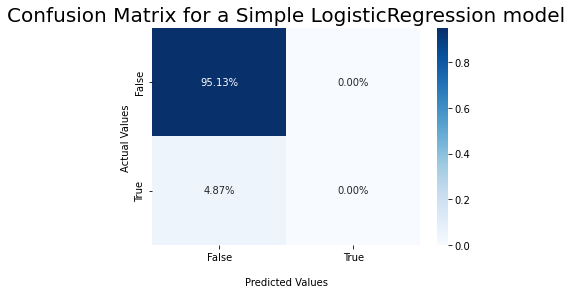

Precision:  0.0
Recall:  0.0
F1 score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [336]:
call_cross_val_predict(log_reg, X_train, y_train, "Confusion Matrix for a Simple LogisticRegression model")

Unfortunately, this confusion matrix confirms what we have been worrying about: **this simple LogisticRegression simply classifies all entries as 'stroke=0'. This is certainly not what we wanted!**

The primary reason for this error is the fact that our dataset is **highly unbalanced.** As a workaround, we may try to artificially assign higher weights to the minority class (stroke=1), that we are trying to predict.

#### Weighted Logistic Regression

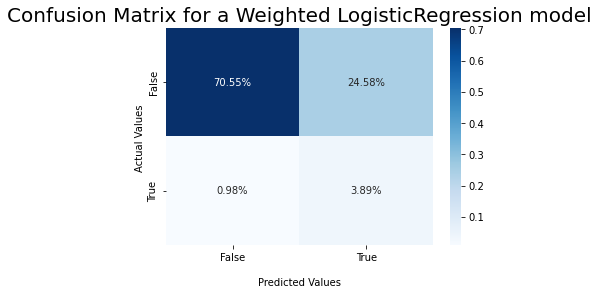

Precision:  0.13659793814432988
Recall:  0.7989949748743719
F1 score:  0.23330887747615553


In [337]:
weighted_log_reg = LogisticRegression(random_state=random_state, class_weight='balanced', max_iter=1000, tol=1e-6)
call_cross_val_predict(weighted_log_reg, X_train, y_train, "Confusion Matrix for a Weighted LogisticRegression model")

The improvement is fascinating: although the precision is still quite low, a recall 0f 0.79 is actually quite promising. This means that the model detects the people who had a stroke quite well, but it additionally predicts lots of other people to have a stroke too. 

This result **suggests that this time the weight of the minority class was in fact too high**. We should ask ourselves the question: can we find a parameter for the class weights that allows us to balance the precision and the recall?

Moreover, there's also a chance that the model **may have overfitted**. To overcome this issue, we should try to apply a stronger regularization. Note that L2 regularization is applied by default in LogisticRegression models, but we can make it stronger by increasing the C 'regularization strength' parameter.

Let's use grid-search to find that out!

##### Grid-Search for finding the appropriate class weights and regularisation strength

In [338]:
weight_pairs_spec = get_weight_pairs_spec(1, 46, 3)
weight_pairs_spec

[{0: 1, 1: 99},
 {0: 4, 1: 96},
 {0: 7, 1: 93},
 {0: 10, 1: 90},
 {0: 13, 1: 87},
 {0: 16, 1: 84},
 {0: 19, 1: 81},
 {0: 22, 1: 78},
 {0: 25, 1: 75},
 {0: 28, 1: 72},
 {0: 31, 1: 69},
 {0: 34, 1: 66},
 {0: 37, 1: 63},
 {0: 40, 1: 60},
 {0: 43, 1: 57}]

In [339]:
weighted_log_reg = LogisticRegression(random_state=random_state, max_iter=1000, tol=1e-6)
reg_strengths = [0.001, 0.1, 1, 10, 1000]
grid_values = {'class_weight': weight_pairs_spec, 'C': reg_strengths}
grid_weighted_log_reg = GridSearchCV(weighted_log_reg, cv = 3, param_grid = grid_values, scoring = ['f1', 'recall', 'precision'], refit='f1', return_train_score=True)
grid_weighted_log_reg.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          tol=1e-06),
             param_grid={'C': [0.001, 0.1, 1, 10, 1000],
                         'class_weight': [{0: 1, 1: 99}, {0: 4, 1: 96},
                                          {0: 7, 1: 93}, {0: 10, 1: 90},
                                          {0: 13, 1: 87}, {0: 16, 1: 84},
                                          {0: 19, 1: 81}, {0: 22, 1: 78},
                                          {0: 25, 1: 75}, {0: 28, 1: 72},
                                          {0: 31, 1: 69}, {0: 34, 1: 66},
                                          {0: 37, 1: 63}, {0: 40, 1: 60},
                                          {0: 43, 1: 57}]},
             refit='f1', return_train_score=True,
             scoring=['f1', 'recall', 'precision'])

In [340]:
print(f'Best f1 score: {grid_weighted_log_reg .best_score_} with param: {grid_weighted_log_reg .best_params_}')

Best f1 score: 0.29182334434022 with param: {'C': 0.1, 'class_weight': {0: 13, 1: 87}}


In [341]:
get_cross_val_detailed_results_df(grid_weighted_log_reg)

,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,params,f1_train_test_difference
0,0.121,0.121,0.994,0.994,0.064,0.065,"{'C': 0.001, 'class_weight': {0: 1, 1: 99}}",0.001
1,0.203,0.214,0.824,0.881,0.116,0.122,"{'C': 0.001, 'class_weight': {0: 4, 1: 96}}",0.011
2,0.251,0.259,0.679,0.711,0.154,0.158,"{'C': 0.001, 'class_weight': {0: 7, 1: 93}}",0.008
3,0.270,0.274,0.516,0.541,0.183,0.183,"{'C': 0.001, 'class_weight': {0: 10, 1: 90}}",0.004
4,0.241,0.258,0.346,0.377,0.186,0.197,"{'C': 0.001, 'class_weight': {0: 13, 1: 87}}",0.018
...,...,...,...,...,...,...,...,...
70,0.122,0.109,0.082,0.069,0.327,0.276,"{'C': 1000, 'class_weight': {0: 31, 1: 69}}",-0.013
71,0.079,0.092,0.050,0.053,0.261,0.364,"{'C': 1000, 'class_weight': {0: 34, 1: 66}}",0.013
72,0.044,0.063,0.025,0.035,0.431,0.400,"{'C': 1000, 'class_weight': {0: 37, 1: 63}}",0.019
73,0.021,0.030,0.013,0.016,0.067,0.264,"{'C': 1000, 'class_weight': {0: 40, 1: 60}}",0.008


It seems like the best class weights that we can use are **10 for the stroke=0 and 90 for the stroke=1 class**, which are different from the balanced class weights.

On the other hand, regularization doesn't seem to make a difference: if we take a look at the difference between the f1 scores on the train and the test sets in crowss validtaion, we see minor differences independently from the strength of the regularization applied. This proved that our model **did not overfit**.

###### Evaluation on the validation set

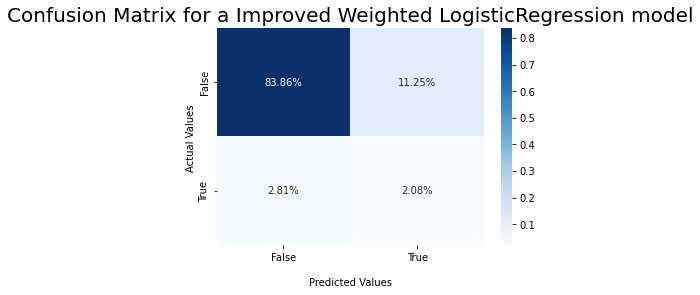

Precision:  0.1559633027522936
Recall:  0.425
F1 score:  0.22818791946308722


In [342]:
y_pred = grid_weighted_log_reg.predict(X_valid1)
plot_confusion_matrix(y_valid1, y_pred, title = "Confusion Matrix for a Improved Weighted LogisticRegression model")

Indeed, by setting the weight of the minority class slightly lower, we obtained a better result. However, we still cannot be satisfied with the precision of this model. Let's take a look at the precision-recall curve to see whether we could find a better compromise between the precision and the recall.

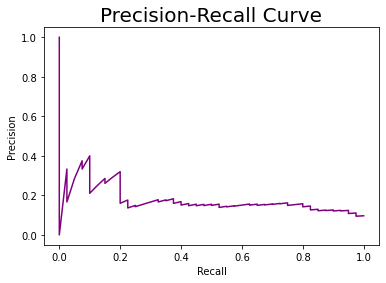

In [343]:
y_score_pred = grid_weighted_log_reg.predict_proba(X_valid1)[:, 1]
plot_precision_recall_curve(y_valid1, y_score_pred)

The curve has a very unsatisfying shape: we would expect it to be close to the upper-right corner, but in reality there's no decision threshold for which both the precision and the recall would be acceptably high. 

#### Logistic Regression on a SMOTE-balanced dataset

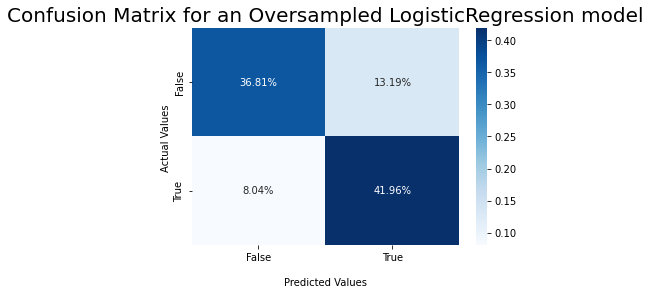

Precision:  0.7607934655775963
Recall:  0.8391248391248392
F1 score:  0.7980416156670747


In [344]:
smote_log_reg = LogisticRegression(random_state=random_state, max_iter=1000, tol=1e-6)
call_cross_val_predict(smote_log_reg, smote_X_train1, smote_y_train1, "Confusion Matrix for an Oversampled LogisticRegression model")

This score looks really good, but is **misleading**: it only shows that the model is good ad predicting the class of the entries in the SMOTE-oversampeld dataset. But, it is possible that the model only learnt the particularities o fthe artificially synthesised data, and is not working well on the original dataset. Note that under- and oversampling is not a data preprocessing step that we should later apply for the production data as well: these steps should only be used in training.

The correct process would be that of:
1. training the model on the balanced dataset
2. evaluating the model on the original validation dataset

Let's see what happens if we evaluate the model on the validation set that we originally separated:

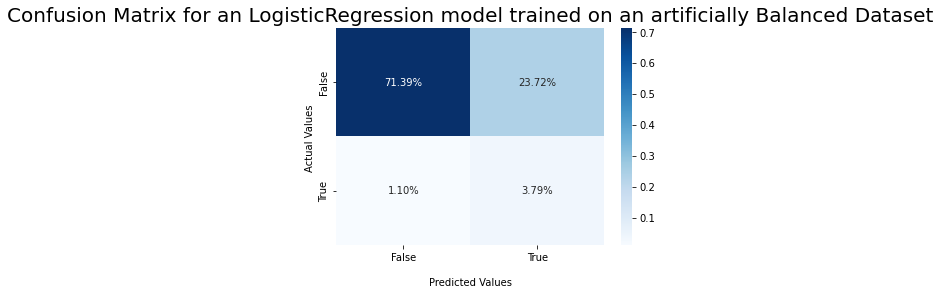

Precision:  0.13777777777777778
Recall:  0.775
F1 score:  0.2339622641509434


In [345]:
smote_log_reg.fit(smote_X_train1, smote_y_train1)
y_pred = smote_log_reg.predict(X_valid1)
plot_confusion_matrix(y_valid1, y_pred, title = "Confusion Matrix for an LogisticRegression model trained on an artificially Balanced Dataset")

We can see that overall the model doesn't seem to perform any better that the one obtained by setting higher class weights, the f1-scores are in fact very similar, despite using completely different methods for overcoming the imbalance issue.

#### Conclusions about the Logistic Regression

To sum op our experiments with Logistic Regression models, we can simply say that none of them provided good enough results. 

**The best f1-score was 0.265** with the hyperparameters:


*   class weights: {0: 10, 1: 90}
*   C: 0.1
*   max_iter: 1000

Before taking the next steps, we should think about why the LogisticRegression performed so badly. To answer this question, we should dive deeper into the working mechanism of the logistic regression models: they estimate the probability of an entry belonging to a certain class by applying the sigmoid function to a weighted linear combination of the features. **The key here is that it cannot actually learn non-linear relationships between the features and the label.** Knowing that we didn't have any feature in our dataset, which would have been highly correlated (thus showing a strong linear relationship with our label) with the label, it is in fact not surprising that a logistic regression cannot perform well. 

So, as a next step, we should focus on ML models capable of treating non-linear relationships.

### Experiments with Support Vector Machines

#### With Class Weights

SVMs generally work better with values centered around the mean, so we'll apply a StandardScaler to achieve that.

Moreover, we should use a higher penalty weight for the minority class to overcome the issue of having a highly unbalanced dataset.

Accuracies obtained with SVC using 5-fold cross-validation
[0.04889976 0.04889976 0.04889976 0.95226438 0.04895961]
Mean Accuracy:  0.22958465134234918


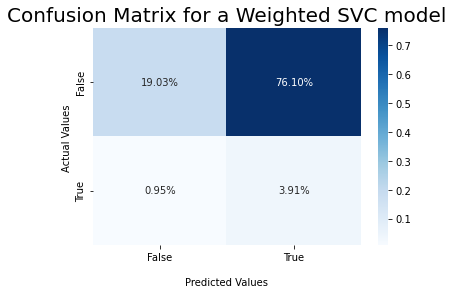

Precision:  0.04891470498318557
Recall:  0.8040201005025126
F1 score:  0.09221902017291066


In [346]:
rbf_kernel_svm_clf = Pipeline([
      ('scaler', StandardScaler()),
      ('svm_clf', SVC(kernel="rbf", gamma=5, C=0.001, class_weight='balanced', random_state=random_state))  
])

print("Accuracies obtained with SVC using 5-fold cross-validation")
scores = cross_val_score(rbf_kernel_svm_clf, X_train, y_train, cv = 5)
print(scores)
mean_score = scores.mean()
print("Mean Accuracy: ", mean_score)

call_cross_val_predict(rbf_kernel_svm_clf, X_train, y_train, "Confusion Matrix for a Weighted SVC model")

We ended up with the same mistake: all entries are classified as having no-stroke, despite explicitly telling the SVC to use higher weights for entries with a stroke.

**A possible cause of the mistake is overfitting and underfitting**: SVCs are really sensitive to the **regularization parameter C and the gamma coefficient**. In general, we can say that 


*   C is inversely proportional to the regularization strength.  
   * **C should be decreased if the model is overfitting**. For a low C, the decision boundary chosen by SVC has a larger margin, suggesting a 'more confident' model, less sensitive to the particularities of the training data, but at the cost of a greater number of missclassifications.
   * **C should be increased if the model is underfitting**
*   gamma shows the influence of each instance on the decision boundary, thus it acts as a regularization parameter as well
   * **gamma should be decreased if the model is overfitting**, making the influence of each instance larger and the decision boundary smoother
   * **gamma should be increased if the model is underfitting**



Let's see if changing these hyperparameters we can obtain better results.

##### Grid Search 1 to solve overfitting

In [347]:
weight_pairs_spec = get_weight_pairs_spec(1, 10, 3)
param_grid = {'C': [100, 1, 0.01], 'gamma': [100, 1, 0.01], 'kernel': ['rbf'], 'class_weight': weight_pairs_spec}
grid_svc = GridSearchCV(SVC(random_state=random_state), cv = 3, param_grid = param_grid, scoring = ['f1', 'recall', 'precision'], refit='f1', return_train_score=True)
scaler = StandardScaler()
scaled_X_train1 = scaler.fit_transform(X_train1)
grid_svc.fit(scaled_X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [100, 1, 0.01],
                         'class_weight': [{0: 1, 1: 99}, {0: 4, 1: 96},
                                          {0: 7, 1: 93}],
                         'gamma': [100, 1, 0.01], 'kernel': ['rbf']},
             refit='f1', return_train_score=True,
             scoring=['f1', 'recall', 'precision'])

In [348]:
print(f'Best f1 score: {grid_svc.best_score_} with param: {grid_svc.best_params_}')

Best f1 score: 0.2415182032734368 with param: {'C': 0.01, 'class_weight': {0: 7, 1: 93}, 'gamma': 0.01, 'kernel': 'rbf'}


In [349]:
get_cross_val_detailed_results_df(grid_svc)

,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,params,f1_train_test_difference
0,0.000,1.000,0.000,1.000,0.000,1.000,"{'C': 100, 'class_weight': {0: 1, 1: 99}, 'gam...",1.000
1,0.076,0.986,0.069,1.000,0.087,0.972,"{'C': 100, 'class_weight': {0: 1, 1: 99}, 'gam...",0.910
2,0.152,0.335,0.428,1.000,0.093,0.201,"{'C': 100, 'class_weight': {0: 1, 1: 99}, 'gam...",0.182
3,0.000,1.000,0.000,1.000,0.000,1.000,"{'C': 100, 'class_weight': {0: 4, 1: 96}, 'gam...",1.000
4,0.071,0.998,0.063,1.000,0.084,0.997,"{'C': 100, 'class_weight': {0: 4, 1: 96}, 'gam...",0.927
5,0.164,0.426,0.365,1.000,0.106,0.271,"{'C': 100, 'class_weight': {0: 4, 1: 96}, 'gam...",0.262
6,0.000,1.000,0.000,1.000,0.000,1.000,"{'C': 100, 'class_weight': {0: 7, 1: 93}, 'gam...",1.000
7,0.072,1.000,0.063,1.000,0.085,1.000,"{'C': 100, 'class_weight': {0: 7, 1: 93}, 'gam...",0.928
8,0.178,0.503,0.327,0.962,0.123,0.341,"{'C': 100, 'class_weight': {0: 7, 1: 93}, 'gam...",0.325
9,0.000,1.000,0.000,1.000,0.000,1.000,"{'C': 1, 'class_weight': {0: 1, 1: 99}, 'gamma...",1.000


We can perform a **more focused search based on the previous results**, by choosing hyperparameter values closer to the ones that resulted in the previous maximum.

We can concluse based on the previous table that:

*   **class weights around 4/96 and 7/93 seem most promising**
*   **gamma should likely be reduced** (definitely below 1, maybe try some values below 0.01)
*   **C should also be reduced**, since C=100 produces significantly higher differences between the train and test f1-scores than the other C values

**The fact that both C and gamma ahouls be reduced proved that previously indeed our model was severely overfitting the training data.**



##### Grid Search 2

In [350]:
weight_pairs_spec = get_weight_pairs_spec(4, 11, 2)
param_grid = {'C': [5, 1, 0.1], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf'], 'class_weight': weight_pairs_spec}
grid_svc = GridSearchCV(SVC(random_state=random_state), cv = 3, param_grid = param_grid, scoring = ['f1', 'recall', 'precision'], refit='f1', return_train_score=True)

scaler = StandardScaler()
scaled_X_train1 = scaler.fit_transform(X_train1)
grid_svc.fit(scaled_X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [5, 1, 0.1],
                         'class_weight': [{0: 4, 1: 96}, {0: 6, 1: 94},
                                          {0: 8, 1: 92}, {0: 10, 1: 90}],
                         'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
             refit='f1', return_train_score=True,
             scoring=['f1', 'recall', 'precision'])

In [351]:
print(f'Best f1 score: {grid_svc.best_score_} with param: {grid_svc.best_params_}')

Best f1 score: 0.2693778791444927 with param: {'C': 0.1, 'class_weight': {0: 10, 1: 90}, 'gamma': 0.01, 'kernel': 'rbf'}


In [352]:
get_cross_val_detailed_results_df(grid_svc)

,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,params,f1_train_test_difference
0,0.185,0.295,0.585,0.959,0.110,0.174,"{'C': 5, 'class_weight': {0: 4, 1: 96}, 'gamma...",0.110
1,0.205,0.226,0.799,0.881,0.118,0.130,"{'C': 5, 'class_weight': {0: 4, 1: 96}, 'gamma...",0.021
2,0.198,0.208,0.836,0.893,0.112,0.118,"{'C': 5, 'class_weight': {0: 4, 1: 96}, 'gamma...",0.010
3,0.187,0.345,0.478,0.915,0.117,0.213,"{'C': 5, 'class_weight': {0: 6, 1: 94}, 'gamma...",0.158
4,0.232,0.253,0.742,0.811,0.137,0.150,"{'C': 5, 'class_weight': {0: 6, 1: 94}, 'gamma...",0.021
5,0.226,0.237,0.780,0.802,0.132,0.139,"{'C': 5, 'class_weight': {0: 6, 1: 94}, 'gamma...",0.011
6,0.193,0.387,0.421,0.871,0.126,0.249,"{'C': 5, 'class_weight': {0: 8, 1: 92}, 'gamma...",0.194
7,0.240,0.266,0.667,0.733,0.146,0.162,"{'C': 5, 'class_weight': {0: 8, 1: 92}, 'gamma...",0.026
8,0.243,0.253,0.698,0.717,0.147,0.154,"{'C': 5, 'class_weight': {0: 8, 1: 92}, 'gamma...",0.010
9,0.211,0.421,0.390,0.805,0.145,0.285,"{'C': 5, 'class_weight': {0: 10, 1: 90}, 'gamm...",0.210


Conclusions:




*   Although the best score was obtained for C=0.1, the C parameters in the range [0.1, 5] seem to produce quite significant results. We may not need to tune this hyperparameter any further
*   On the other hand, lowering the gamma still seems promising. Note that the f1 score was increased by 3% compared to the first grid search.




##### Grid Search 3

In [353]:
weight_pairs_spec = get_weight_pairs_spec(7, 14, 2)
param_grid = {'C': [1, 0.1], 'gamma': [0.005, 0.001, 0.0005, 0.0001], 'kernel': ['rbf'], 'class_weight': weight_pairs_spec}
grid_svc = GridSearchCV(SVC(), cv = 3, param_grid = param_grid, scoring = ['f1', 'recall', 'precision'], refit='f1', return_train_score=True)

scaler = StandardScaler()
scaled_X_train1 = scaler.fit_transform(X_train1)
grid_svc.fit(scaled_X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 0.1],
                         'class_weight': [{0: 7, 1: 93}, {0: 9, 1: 91},
                                          {0: 11, 1: 89}, {0: 13, 1: 87}],
                         'gamma': [0.005, 0.001, 0.0005, 0.0001],
                         'kernel': ['rbf']},
             refit='f1', return_train_score=True,
             scoring=['f1', 'recall', 'precision'])

In [354]:
print(f'Best f1 score: {grid_svc.best_score_} with param: {grid_svc.best_params_}')

Best f1 score: 0.2768738870001619 with param: {'C': 1, 'class_weight': {0: 11, 1: 89}, 'gamma': 0.005, 'kernel': 'rbf'}


In [355]:
get_cross_val_detailed_results_df(grid_svc)

,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,params,f1_train_test_difference
0,0.240,0.276,0.673,0.792,0.147,0.167,"{'C': 1, 'class_weight': {0: 7, 1: 93}, 'gamma...",0.035
1,0.237,0.252,0.736,0.770,0.142,0.151,"{'C': 1, 'class_weight': {0: 7, 1: 93}, 'gamma...",0.015
2,0.239,0.248,0.742,0.761,0.143,0.148,"{'C': 1, 'class_weight': {0: 7, 1: 93}, 'gamma...",0.009
3,0.241,0.259,0.642,0.698,0.149,0.159,"{'C': 1, 'class_weight': {0: 7, 1: 93}, 'gamma...",0.018
4,0.251,0.301,0.616,0.742,0.157,0.189,"{'C': 1, 'class_weight': {0: 9, 1: 91}, 'gamma...",0.050
5,0.247,0.264,0.654,0.701,0.152,0.163,"{'C': 1, 'class_weight': {0: 9, 1: 91}, 'gamma...",0.018
6,0.253,0.263,0.648,0.673,0.157,0.163,"{'C': 1, 'class_weight': {0: 9, 1: 91}, 'gamma...",0.010
7,0.230,0.242,0.421,0.462,0.160,0.164,"{'C': 1, 'class_weight': {0: 9, 1: 91}, 'gamma...",0.012
8,0.277,0.333,0.572,0.689,0.183,0.219,"{'C': 1, 'class_weight': {0: 11, 1: 89}, 'gamm...",0.056
9,0.262,0.282,0.541,0.613,0.173,0.183,"{'C': 1, 'class_weight': {0: 11, 1: 89}, 'gamm...",0.020


While overall the results are slightly higher, we could not reach a significant improvment with the best hyperparameter configuration compared to the previous grid search result. 

So far, it seems like the SVC slightly outperforms the LogisticRegression results. But let's compare them both on the validation set as well:

###### Evaluation on the validation set

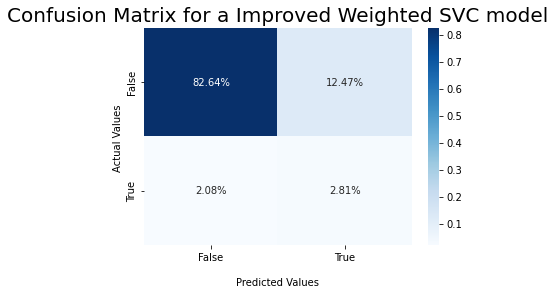

Precision:  0.184
Recall:  0.575
F1 score:  0.2787878787878788


In [356]:
scaled_X_valid1 = scaler.transform(X_valid1)
y_pred = grid_svc.predict(scaled_X_valid1)
plot_confusion_matrix(y_valid1, y_pred, "Confusion Matrix for a Improved Weighted SVC model")

#### On a SMOTE-balanced dataset

In [357]:
gammas = [10, 1, 0.1, 0.01, 0.001, 0.0001]
Cs = [1000, 100, 10, 1, 0.1, 0.01]

In [358]:
for gamma in gammas:
  for C in Cs:
    rbf_kernel_svm_clf = Pipeline([
          ('scaler', StandardScaler()),
          ('svm_clf', SVC(kernel="rbf", gamma=gamma, C=C, random_state=random_state))  
    ])

    rbf_kernel_svm_clf.fit(smote_X_train1, smote_y_train1)

    y_pred = rbf_kernel_svm_clf.predict(X_valid1)

    conf_mat = confusion_matrix(y_valid1, y_pred)
    print("-----------------------------------SVC with parameters Gamma=", gamma, ", C=", C, "----------------------------------")
    # plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a SVC model trained on an artificially Balanced Dataset")
    print_metrics(y_valid1, y_pred)

-----------------------------------SVC with parameters Gamma= 10 , C= 1000 ----------------------------------
Precision:  0.10714285714285714
Recall:  0.075
F1 score:  0.08823529411764705
-----------------------------------SVC with parameters Gamma= 10 , C= 100 ----------------------------------
Precision:  0.10714285714285714
Recall:  0.075
F1 score:  0.08823529411764705
-----------------------------------SVC with parameters Gamma= 10 , C= 10 ----------------------------------
Precision:  0.10714285714285714
Recall:  0.075
F1 score:  0.08823529411764705
-----------------------------------SVC with parameters Gamma= 10 , C= 1 ----------------------------------
Precision:  0.12
Recall:  0.075
F1 score:  0.0923076923076923
-----------------------------------SVC with parameters Gamma= 10 , C= 0.1 ----------------------------------
Precision:  0.1111111111111111
Recall:  0.075
F1 score:  0.08955223880597014
-----------------------------------SVC with parameters Gamma= 10 , C= 0.01 ---------

The best results could be obtained with a lower gamma (0.01) and the default C (1) hyperparameters, but we still couldn't get better results than the previous ones with class weights. The SMOTE-based oversampling does not seem a promising approach.

#### Conclusions about SVC-s

So far , it seems like SVC-s could not significantly outperform the Logistic Regressors.

**The best f1-score was 0.269** with the hyperparameters:


*   class weights: {0: 11, 1: 89}
*   C: 1
*   gamma: 0.001

These results are not strong enough to be used in a predictive model on their own, but we may consider combining these models later through Ensemble Learning techniques.

### Experiments with Random Forests Models


#### Experiments with Random Forest Classifier


[0.94987775 0.94865526 0.94987775 0.95348837 0.9498164 ]
Mean Accuracy:  0.9503431063016043


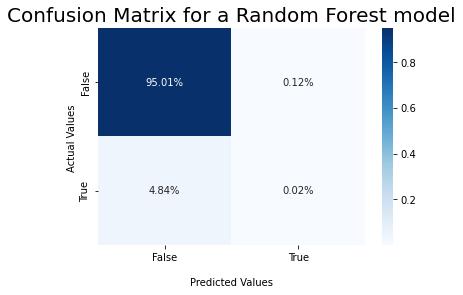

Precision:  0.16666666666666666
Recall:  0.005025125628140704
F1 score:  0.009756097560975611


In [359]:
simple_random_forest = RandomForestClassifier(random_state=random_state, criterion='entropy')
scores = cross_val_score(simple_random_forest, X_train, y_train, cv = 5)
print(scores)
mean_score = scores.mean()
print("Mean Accuracy: ", mean_score)

call_cross_val_predict(simple_random_forest, X_train, y_train, "Confusion Matrix for a Random Forest model")

Although the data is not balanced and we have not applied any weights it seems that the random forest is able to give some precision but it is anyway very low, so we still have to do something about it.

#### Weighted Random Forest


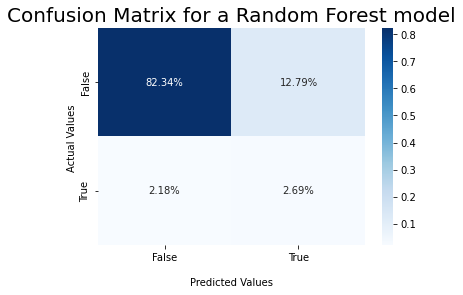

Precision:  0.17377567140600317
Recall:  0.5527638190954773
F1 score:  0.2644230769230769


In [360]:
rnd_for = RandomForestClassifier(random_state=random_state, class_weight={0:7, 1:93}, criterion='entropy',
                                 n_estimators = 100, max_leaf_nodes = 30)
call_cross_val_predict(rnd_for, X_train, y_train, "Confusion Matrix for a Random Forest model")

We have some improvement, at this point we should make a grid serach to find 
*   the appropiate weights
*   appropiate values for n_estimators i.e. the number of trees we will have
*   the max_leaf_nodes

Note that the max_leaf_nodes hyperparameter acts as a rgeularization parameter: the more leaf nodes the trees have, the more particularities of the training data the model can learn. By restricting the number of lead nodes we force the model to learn only the properties that seem significant enough to expect that they can be generalized.

#### Grid Search

In [361]:
weight_pairs_spec = get_weight_pairs_spec(1, 12, 3)
weighted_rf = RandomForestClassifier(random_state=random_state, criterion='entropy')
param_grid = {
    'n_estimators': [50, 150, 300, 450],
    'max_leaf_nodes': [5, 15, 30, 45],
    'class_weight': weight_pairs_spec
}
grid_search_weighted_rf = GridSearchCV(estimator = weighted_rf, cv = 3, param_grid = param_grid, 
                          scoring = ['f1', 'recall', 'precision'], refit='f1', return_train_score=True)
grid_search_weighted_rf.fit(X_train1, y_train1)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 99}, {0: 4, 1: 96},
                                          {0: 7, 1: 93}, {0: 10, 1: 90}],
                         'max_leaf_nodes': [5, 15, 30, 45],
                         'n_estimators': [50, 150, 300, 450]},
             refit='f1', return_train_score=True,
             scoring=['f1', 'recall', 'precision'])

In [362]:
print(f'Best f1 score: {grid_search_weighted_rf .best_score_} with param: {grid_search_weighted_rf .best_params_}')

Best f1 score: 0.27691864541689587 with param: {'class_weight': {0: 7, 1: 93}, 'max_leaf_nodes': 30, 'n_estimators': 50}


It seems that the best f1 score we have achived is for a class weight of 96 for positive stroke, max leaf nodes = 30 and n_estimators = 200

In [363]:
get_cross_val_detailed_results_df(grid_search_weighted_rf)

,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,params,f1_train_test_difference
0,0.163,0.165,0.975,0.994,0.089,0.090,"{'class_weight': {0: 1, 1: 99}, 'max_leaf_node...",0.002
1,0.161,0.163,0.975,0.994,0.088,0.089,"{'class_weight': {0: 1, 1: 99}, 'max_leaf_node...",0.002
2,0.160,0.161,0.975,0.994,0.087,0.088,"{'class_weight': {0: 1, 1: 99}, 'max_leaf_node...",0.001
3,0.159,0.161,0.975,0.994,0.087,0.088,"{'class_weight': {0: 1, 1: 99}, 'max_leaf_node...",0.002
4,0.182,0.194,0.931,0.997,0.101,0.107,"{'class_weight': {0: 1, 1: 99}, 'max_leaf_node...",0.012
...,...,...,...,...,...,...,...,...
59,0.209,0.664,0.201,0.730,0.221,0.610,"{'class_weight': {0: 10, 1: 90}, 'max_leaf_nod...",0.455
60,0.216,0.747,0.189,0.799,0.260,0.704,"{'class_weight': {0: 10, 1: 90}, 'max_leaf_nod...",0.532
61,0.148,0.810,0.113,0.808,0.214,0.811,"{'class_weight': {0: 10, 1: 90}, 'max_leaf_nod...",0.662
62,0.142,0.799,0.107,0.786,0.211,0.812,"{'class_weight': {0: 10, 1: 90}, 'max_leaf_nod...",0.657


#### Evaluation on the validation set

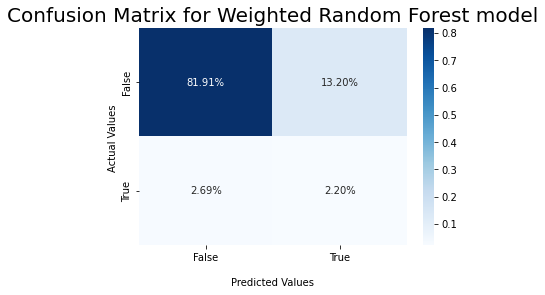

Precision:  0.14285714285714285
Recall:  0.45
F1 score:  0.21686746987951805


In [364]:
y_pred = grid_search_weighted_rf.predict(X_valid1)
plot_confusion_matrix(y_valid1, y_pred, "Confusion Matrix for Weighted Random Forest model")

This is the maximum we could achive with the weighted random forest, it seems that it didn't perform so good, not even better than the Logistic Regression.

#### SMOTE for Random Forest

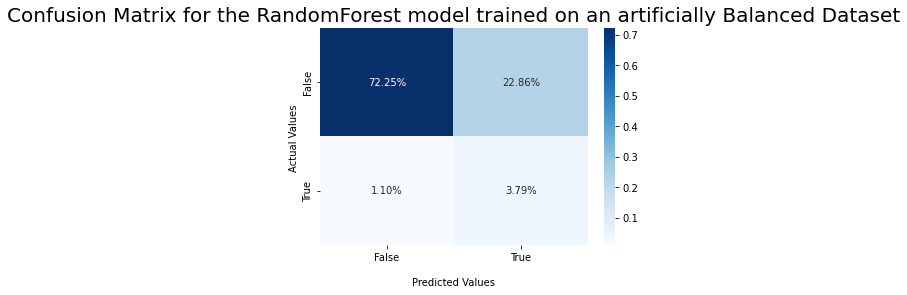

Precision:  0.14220183486238533
Recall:  0.775
F1 score:  0.24031007751937983


In [365]:
smote_rf = RandomForestClassifier(random_state=random_state, criterion='entropy',
                                 n_estimators = 200, max_leaf_nodes = 30)
smote_rf.fit(smote_X_train1, smote_y_train1)
y_pred = smote_rf.predict(X_valid1)
plot_confusion_matrix(y_valid1, y_pred, "Confusion Matrix for the RandomForest model trained on an artificially Balanced Dataset")

It seems that the better result that we can achive for Random Forest is still the one obtained with the weighted class.

#### Conclusions about Random Forests

Random forests could not outpeform the LogisticRegressions and SVCs, but produces significant results.

**The best f1-score was 0.258** with the hyperparameters:


*   class weights: {0: 4, 1: 96}
*   n_estimators: 200
*   max_leaf_nodes: 30

### Combining Methods: Experiments with a Voting Classifier


Considering that neither of the models we have so far have lead to satisfying results, maybe if we combine them by using a Voting Classifer may lead to better results. For this voting classifier we will use the parameters that we found to perform best so far for each model i.e. logistic regression, SVM and random forests.

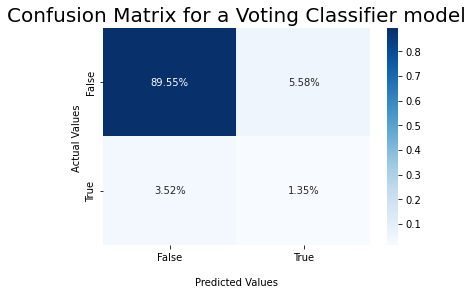

Precision:  0.19434628975265017
Recall:  0.27638190954773867
F1 score:  0.22821576763485477


In [366]:
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(random_state=random_state, class_weight={0:10, 1:90}, max_iter=1000, tol=1e-6)
rnd_clf = RandomForestClassifier(random_state=random_state, class_weight={0:4, 1:96}, criterion='entropy',
                                 n_estimators = 200, max_leaf_nodes = 30)
svm_clf = Pipeline([
      ('scaler', StandardScaler()),
      ('svm_clf', SVC(kernel="rbf", gamma=0.001, C=1, class_weight={0:11, 1:89},probability=True, random_state=random_state))  
])

voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='soft')

call_cross_val_predict(voting_clf, X_train, y_train,"Confusion Matrix for a Voting Classifier model")


#### Evaluation On Valid Set

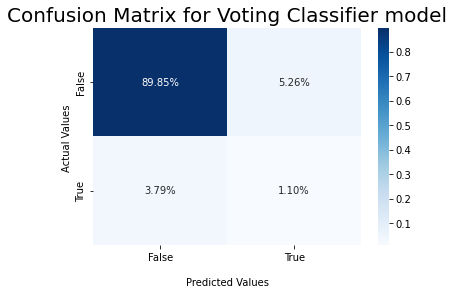

Precision:  0.17307692307692307
Recall:  0.225
F1 score:  0.19565217391304346


In [367]:
voting_clf.fit(X_train1, y_train1)
y_pred = voting_clf.predict(X_valid1)
plot_confusion_matrix(y_valid1, y_pred, "Confusion Matrix for Voting Classifier model")

It seems that this voting classifier is prone to overfitting. We could try to make a grid search to find some better parameters for every model, in the case we use them in a voting classifier.

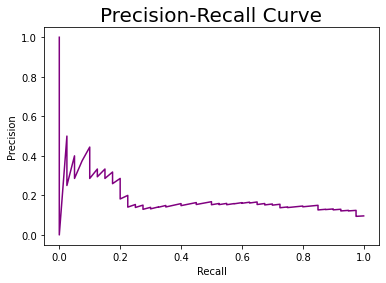

In [368]:
y_score_pred = voting_clf.predict_proba(X_valid1)[:, 1]
plot_precision_recall_curve(y_valid1, y_score_pred)

The PR curve shows that we might get a slightly bigger precision with this classifier (to an expense of a very small recall). But even so the precison is still very small, so it might not be worth.

#### Randomized Search for Voting Classifier

In [369]:
from sklearn.model_selection import RandomizedSearchCV

weight_pairs_spec = get_weight_pairs_spec(1, 11, 3)

grid_voting_clf = VotingClassifier(
 estimators=[('lr', LogisticRegression(max_iter=1000, random_state=random_state)), ('rf', RandomForestClassifier(random_state=random_state)), ('svm', SVC(probability=True, random_state=random_state))],
 voting='soft')
param_grid = {
    'rf__n_estimators': [50, 150, 300, 450],
    'rf__max_leaf_nodes': [5, 15, 30, 45],
    'rf__class_weight': weight_pairs_spec,
    'lr__class_weight': weight_pairs_spec,
    'svm__class_weight': weight_pairs_spec,
    'svm__C': [10, 5, 1, 0.1],
    'svm__gamma': [0.005, 0.001],
    'svm__kernel': ['rbf']
}

rand_search_voting_clf = RandomizedSearchCV(estimator=grid_voting_clf, param_distributions=param_grid, n_iter = 20, cv=5, scoring = ['f1', 'recall', 'precision'], refit='f1', return_train_score=True, random_state=random_state)

rand_search_voting_clf.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5,
                   estimator=VotingClassifier(estimators=[('lr',
                                                           LogisticRegression(max_iter=1000,
                                                                              random_state=42)),
                                                          ('rf',
                                                           RandomForestClassifier(random_state=42)),
                                                          ('svm',
                                                           SVC(probability=True,
                                                               random_state=42))],
                                              voting='soft'),
                   n_iter=20,
                   param_distributions={'lr__class_weight': [{0: 1, 1: 99},
                                                             {0: 4, 1: 96},
                                                             {0: 7, 1: 93},
                                                             {0: 10, 1: 90}],
                                        'rf__class_weight': [{0: 1, 1: 99},
                                                             {0: 4, 1: 96},
                                                             {0: 7, 1: 93},
                                                             {0: 10, 1: 90}],
                                        'rf__max_leaf_nodes': [5, 15, 30, 45],
                                        'rf__n_estimators': [50, 150, 300, 450],
                                        'svm__C': [10, 5, 1, 0.1],
                                        'svm__class_weight': [{0: 1, 1: 99},
                                                              {0: 4, 1: 96},
                                                              {0: 7, 1: 93},
                                                              {0: 10, 1: 90}],
                                        'svm__gamma': [0.005, 0.001],
                                        'svm__kernel': ['rbf']},
                   random_state=42, refit='f1', return_train_score=True,
                   scoring=['f1', 'recall', 'precision'])

In [370]:
print(f'Best f1 score: {rand_search_voting_clf .best_score_} with param: {rand_search_voting_clf .best_params_}')

Best f1 score: 0.2710723661781777 with param: {'svm__kernel': 'rbf', 'svm__gamma': 0.001, 'svm__class_weight': {0: 10, 1: 90}, 'svm__C': 1, 'rf__n_estimators': 300, 'rf__max_leaf_nodes': 5, 'rf__class_weight': {0: 1, 1: 99}, 'lr__class_weight': {0: 10, 1: 90}}


In [371]:
get_cross_val_detailed_results_df(rand_search_voting_clf)

,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,params,f1_train_test_difference
0,0.187,0.239,0.157,0.201,0.250,0.296,"{'svm__kernel': 'rbf', 'svm__gamma': 0.005, 's...",0.052
1,0.187,0.369,0.164,0.321,0.236,0.438,"{'svm__kernel': 'rbf', 'svm__gamma': 0.001, 's...",0.181
2,0.259,0.321,0.660,0.830,0.161,0.199,"{'svm__kernel': 'rbf', 'svm__gamma': 0.005, 's...",0.062
3,0.222,0.429,0.226,0.472,0.224,0.396,"{'svm__kernel': 'rbf', 'svm__gamma': 0.005, 's...",0.206
4,0.207,0.245,0.227,0.266,0.200,0.228,"{'svm__kernel': 'rbf', 'svm__gamma': 0.005, 's...",0.037
5,0.233,0.293,0.271,0.360,0.210,0.248,"{'svm__kernel': 'rbf', 'svm__gamma': 0.001, 's...",0.060
6,0.251,0.346,0.333,0.478,0.203,0.272,"{'svm__kernel': 'rbf', 'svm__gamma': 0.005, 's...",0.096
7,0.262,0.323,0.441,0.560,0.188,0.227,"{'svm__kernel': 'rbf', 'svm__gamma': 0.005, 's...",0.060
8,0.161,0.245,0.132,0.201,0.231,0.316,"{'svm__kernel': 'rbf', 'svm__gamma': 0.005, 's...",0.083
9,0.265,0.275,0.572,0.605,0.173,0.178,"{'svm__kernel': 'rbf', 'svm__gamma': 0.001, 's...",0.010


##### Evaluation on Valid Set

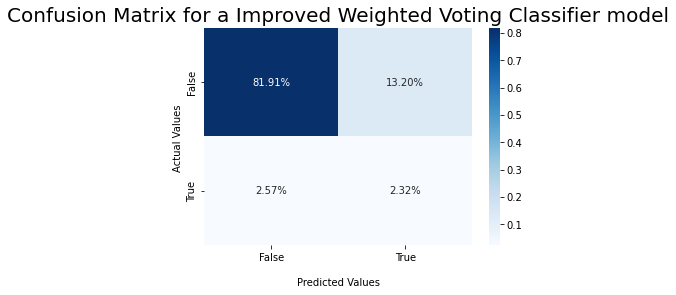

Precision:  0.14960629921259844
Recall:  0.475
F1 score:  0.2275449101796407


In [372]:
y_pred = rand_search_voting_clf.predict(X_valid1)
plot_confusion_matrix(y_valid1, y_pred, "Confusion Matrix for a Improved Weighted Voting Classifier model")

It seems that we managed to improve a bit the Voting Classifier by making a randomized search, but it still does not perfom better than the previous models alone.

#### SMOTE for Voting Classifier

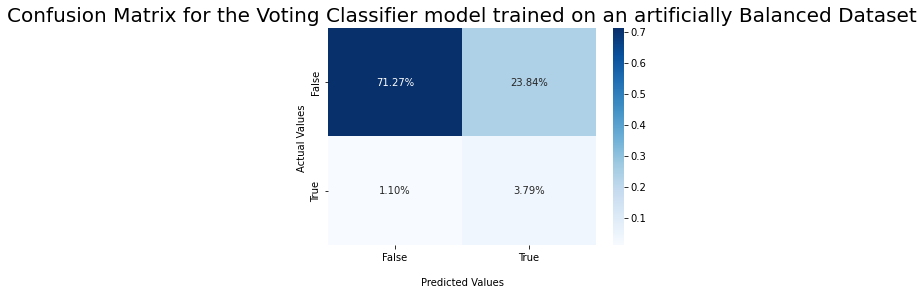

Precision:  0.13716814159292035
Recall:  0.775
F1 score:  0.23308270676691728


In [373]:
log_clf_smote = LogisticRegression(random_state=random_state, max_iter=1000, tol=1e-6)
rnd_clf_smote = RandomForestClassifier(random_state=random_state, criterion='entropy',
                                 n_estimators = 200, max_leaf_nodes = 30)
svm_clf_smote = Pipeline([
      ('scaler', StandardScaler()),
      ('svm_clf', SVC(kernel="rbf", gamma=0.001, C=1, probability=True, random_state=random_state))  
])

voting_clf_smote = VotingClassifier(
 estimators=[('lr', log_clf_smote), ('rf', rnd_clf_smote), ('svc', svm_clf_smote)],
 voting='soft')
voting_clf_smote.fit(smote_X_train1, smote_y_train1)
y_pred = voting_clf_smote.predict(X_valid1)
plot_confusion_matrix(y_valid1, y_pred, "Confusion Matrix for the Voting Classifier model trained on an artificially Balanced Dataset")

With smote we obtained some better recall but also some less precision. It seems that still the weighted randomized search voting classifier is a bit better.

#### Conclusions about Voting Classifiers

As expected, combining 3 different models produces better results, but the difference is not as large as we hoped.

**The best f1-score was 0.28** with the hyperparameters

*  'svm__gamma': 0.005
*  'svm__class_weight': {0: 10, 1: 90}
*  'svm__C': 5
*  'rf__n_estimators': 300
*  'rf__max_leaf_nodes': 30
*  'rf__class_weight': {0: 4, 1: 96}
*  'lr__class_weight': {0: 4, 1: 96}

**The reason for not reaching a greater improvement may be that while the 3 previous models were trained based on completely different techniques, they still may have reached very similar conclusions and may have made very similar mistakes.** Thus, combining them is not significantly better than using any one of them on its own.

It is not the case here, but if we had limited computational resources, then using just a simple SVC instead of the voting classifier may be a better choise than training all three models and making 3 predictions for each instance: the cost vs quality improvement ratio is simpl too low.



### Experiments with Neural Networks

#### Helprer functions

In [374]:
def plot_loss_accuracy_history(history):
  plt.figure(figsize=(16, 8))

  plt.subplot(1, 2, 1)
  plt.plot(pd.DataFrame(history.history['accuracy']))
  plt.plot(pd.DataFrame(history.history['val_accuracy']))
  plt.grid(True)
  plt.title("Accuracy")
  plt.gca().legend(('training accuracy', 'validation accuracy'))

  plt.subplot(1, 2, 2)
  plt.plot(pd.DataFrame(history.history['loss']))
  plt.plot(pd.DataFrame(history.history['val_loss']))
  plt.grid(True)
  plt.title("Loss")
  plt.gca().legend(('training loss', 'validation loss'))
  plt.show()

#### Initial Network


Build an initial, experimental neural network with 2 hidden layers, 30 neurons each.

In [375]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output = keras.layers.Dense(1, activation='sigmoid')(hidden2)
model = keras.models.Model(inputs=[input_], outputs=[output])

model.summary()

reset_seeds()
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-2), metrics=['accuracy'])
history = model.fit(X_train1, y_train1, epochs=100,
                    validation_data=(X_valid1, y_valid1))

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 17)]              0         
                                                                 
 dense_30 (Dense)            (None, 30)                540       
                                                                 
 dense_31 (Dense)            (None, 30)                930       
                                                                 
 dense_32 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
103/103 [==============================] - 1s 4ms/step - loss: 0.3208 - accuracy: 0.9477 - val_loss: 0.2343 - val_accuracy: 0.9511
Epoch 2/100
103/103 [========================

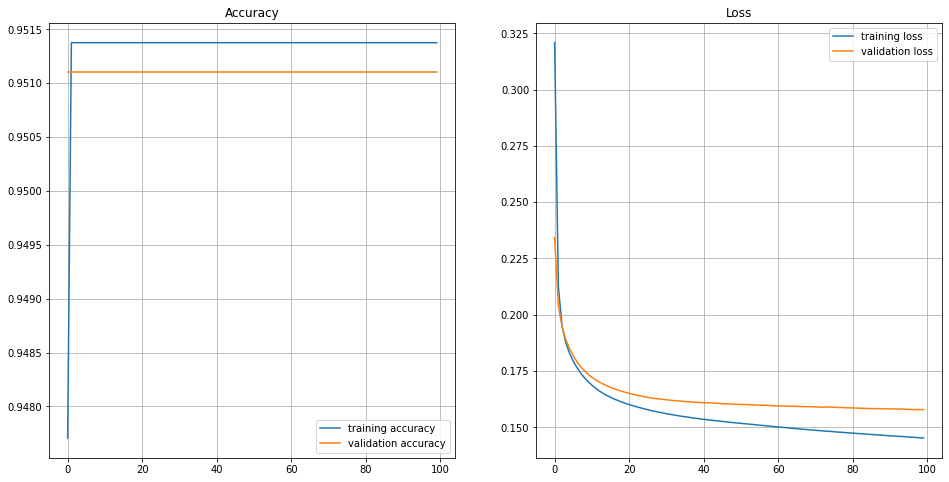

In [376]:
plot_loss_accuracy_history(history)

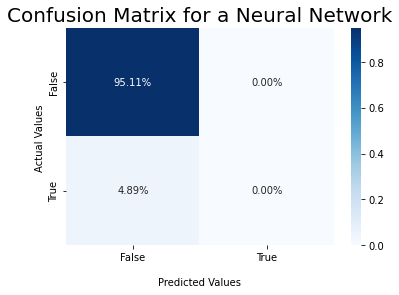

Precision:  0.0
Recall:  0.0
F1 score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [377]:
y_pred = model.predict(X_valid1) >= 0.5
conf_mat = confusion_matrix(y_valid1, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Neural Network")
print_metrics(y_valid1, y_pred)

As we have seen with several previous model, if no class weights are applied, the ANN simply predicts everyone to have no stroke.

#### Applying class weights

In [378]:
input2_ = keras.layers.Input(shape=X_train.shape[1:])
hidden21 = keras.layers.Dense(30, activation="relu")(input2_)
hidden22 = keras.layers.Dense(30, activation="relu")(hidden21)
output2 = keras.layers.Dense(1, activation='sigmoid')(hidden22)
model2 = keras.models.Model(inputs=[input2_], outputs=[output2])

model2.summary()

reset_seeds()
model2.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-2), metrics=['accuracy'])
history2 = model2.fit(X_train1, y_train1, epochs=500, class_weight={0:5, 1:95},
                    validation_data=(X_valid1, y_valid1))

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 17)]              0         
                                                                 
 dense_33 (Dense)            (None, 30)                540       
                                                                 
 dense_34 (Dense)            (None, 30)                930       
                                                                 
 dense_35 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
103/103 [==============================] - 1s 6ms/step - loss: 5.6552 - accuracy: 0.6823 - val_loss: 0.4080 - val_accuracy: 0.7775
Epoch 2/500
103/103 [========================

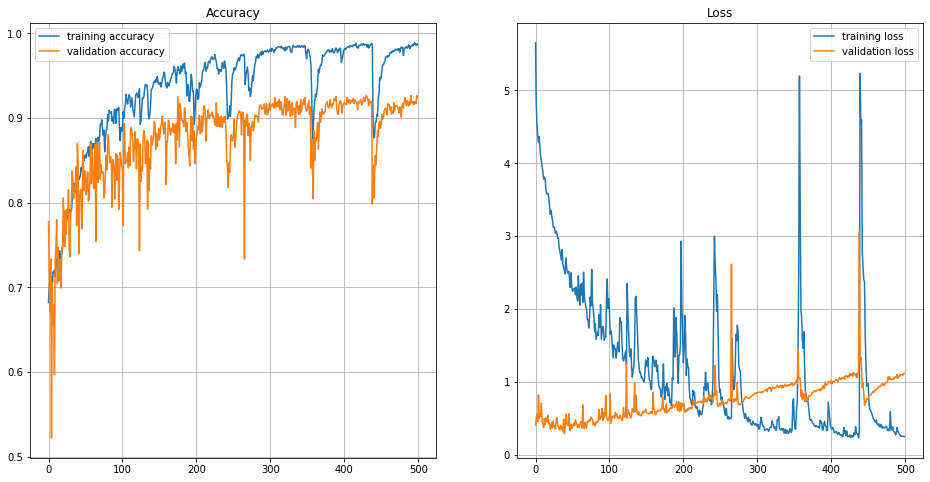

In [379]:
plot_loss_accuracy_history(history2)

We can see a constant improvement, however, the model didn't converge yet.

We'll evaluate the current results, and then we'll try using an optimizer to make the model converge faster.

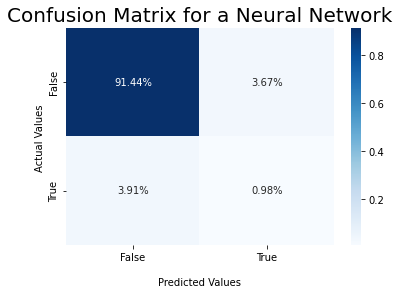

Precision:  0.21052631578947367
Recall:  0.2
F1 score:  0.20512820512820512


In [380]:
y_pred = model2.predict(X_valid1) >= 0.5
conf_mat = confusion_matrix(y_valid1, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Neural Network")
print_metrics(y_valid1, y_pred)

#### Using a nadam optimizer

In [381]:
input3_ = keras.layers.Input(shape=X_train.shape[1:])
hidden31 = keras.layers.Dense(30, activation="relu")(input3_)
hidden32 = keras.layers.Dense(30, activation="relu")(hidden31)
output3 = keras.layers.Dense(1, activation='sigmoid')(hidden32)
model3 = keras.models.Model(inputs=[input3_], outputs=[output3])

reset_seeds()
model3.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(learning_rate=1e-2), metrics=['accuracy'])
history3 = model3.fit(X_train1, y_train1, epochs=500,
                      class_weight={0:5, 1:95},
                    validation_data=(X_valid1, y_valid1))

Epoch 1/500
103/103 [==============================] - 1s 4ms/step - loss: 5.4764 - accuracy: 0.6905 - val_loss: 0.4012 - val_accuracy: 0.7298
Epoch 2/500
103/103 [==============================] - 0s 3ms/step - loss: 4.7911 - accuracy: 0.6768 - val_loss: 0.5458 - val_accuracy: 0.6491
Epoch 3/500
103/103 [==============================] - 0s 2ms/step - loss: 4.4148 - accuracy: 0.6960 - val_loss: 0.5424 - val_accuracy: 0.6797
Epoch 4/500
103/103 [==============================] - 0s 2ms/step - loss: 4.2612 - accuracy: 0.7070 - val_loss: 0.5101 - val_accuracy: 0.6675
Epoch 5/500
103/103 [==============================] - 0s 2ms/step - loss: 4.2051 - accuracy: 0.7015 - val_loss: 0.6092 - val_accuracy: 0.6137
Epoch 6/500
103/103 [==============================] - 0s 2ms/step - loss: 4.2990 - accuracy: 0.6676 - val_loss: 0.5526 - val_accuracy: 0.6516
Epoch 7/500
103/103 [==============================] - 0s 2ms/step - loss: 4.1121 - accuracy: 0.6948 - val_loss: 0.5209 - val_accuracy: 0.6589

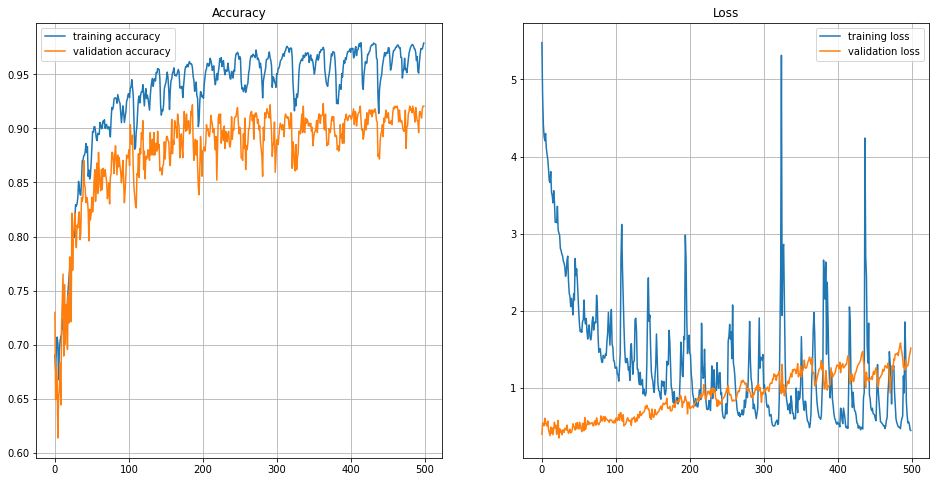

In [382]:
plot_loss_accuracy_history(history3)

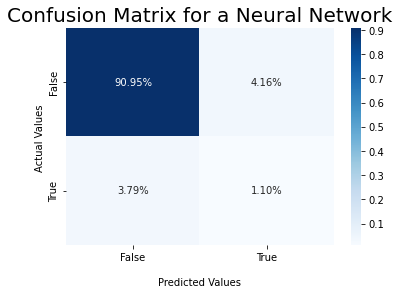

Precision:  0.20930232558139536
Recall:  0.225
F1 score:  0.21686746987951808


In [383]:
y_pred = model3.predict(X_valid1) >= 0.5
conf_mat = confusion_matrix(y_valid1, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Neural Network")
print_metrics(y_valid1, y_pred)

While the nadam optimizers allows the model to seemingly **learn quicker**, in fact the model seems to have learn some particularities of the training dataset and is **severely overfitted**: the loss for the validation dataset has a continuously increasing trend, while the accuracy seems to have converged earlier. Let's consider the following options to avoid overfitting:
*   **stop earlier in the training process**
*   **apply a regularization penalty**

#### Early Stopping

In [384]:
input4_ = keras.layers.Input(shape=X_train.shape[1:])
hidden41 = keras.layers.Dense(30, activation="relu")(input4_)
hidden42 = keras.layers.Dense(30, activation="relu")(hidden41)
output4 = keras.layers.Dense(1, activation='sigmoid')(hidden42)
model4 = keras.models.Model(inputs=[input4_], outputs=[output4])

reset_seeds()
model4.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(learning_rate=1e-2), metrics=['accuracy'])
history4 = model4.fit(X_train1, y_train1, epochs=80,
                      class_weight={0:5, 1:95},
                    validation_data=(X_valid1, y_valid1))

Epoch 1/80
103/103 [==============================] - 1s 4ms/step - loss: 5.4764 - accuracy: 0.6905 - val_loss: 0.4012 - val_accuracy: 0.7298
Epoch 2/80
103/103 [==============================] - 0s 3ms/step - loss: 4.7911 - accuracy: 0.6768 - val_loss: 0.5458 - val_accuracy: 0.6491
Epoch 3/80
103/103 [==============================] - 0s 3ms/step - loss: 4.4148 - accuracy: 0.6960 - val_loss: 0.5424 - val_accuracy: 0.6797
Epoch 4/80
103/103 [==============================] - 0s 2ms/step - loss: 4.2612 - accuracy: 0.7070 - val_loss: 0.5101 - val_accuracy: 0.6675
Epoch 5/80
103/103 [==============================] - 0s 2ms/step - loss: 4.2051 - accuracy: 0.7015 - val_loss: 0.6092 - val_accuracy: 0.6137
Epoch 6/80
103/103 [==============================] - 0s 2ms/step - loss: 4.2990 - accuracy: 0.6676 - val_loss: 0.5526 - val_accuracy: 0.6516
Epoch 7/80
103/103 [==============================] - 0s 2ms/step - loss: 4.1121 - accuracy: 0.6948 - val_loss: 0.5209 - val_accuracy: 0.6589
Epoch 

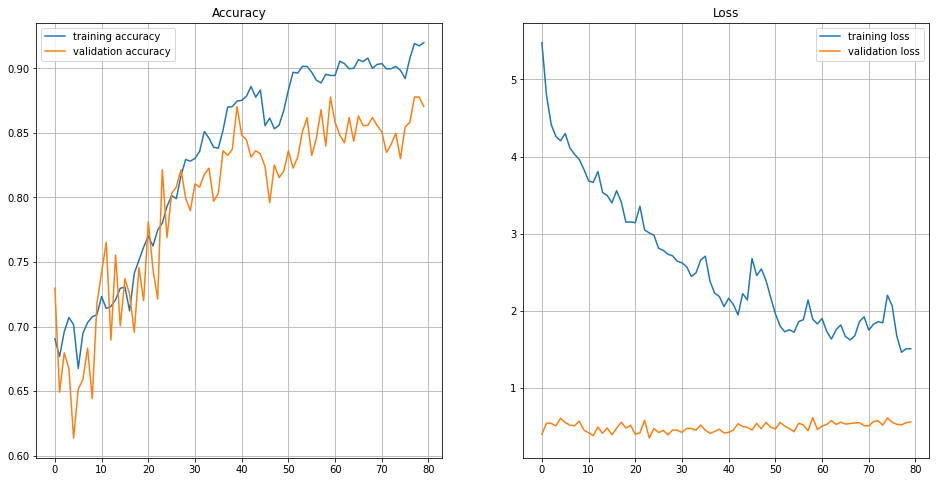

In [385]:
plot_loss_accuracy_history(history4)

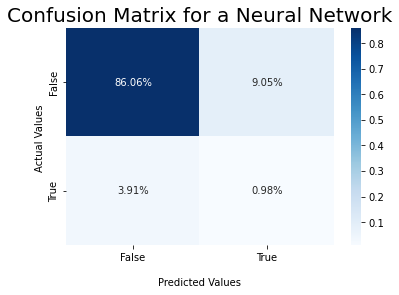

Precision:  0.0975609756097561
Recall:  0.2
F1 score:  0.13114754098360656


In [386]:
y_pred = model4.predict(X_valid1) >= 0.5
conf_mat = confusion_matrix(y_valid1, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Neural Network")
print_metrics(y_valid1, y_pred)

Early stopping has indeed increased the f1-score by a factor of >2, and with early stopping, the Nadam optimizer leads to **a little better result as the model with the default optimizer, in a significantly shorter time**.

#### Regularization: avoid overfitting

Despite early stopping, we can see that the validation loss is still increasing starting from the ~50th epoch. To reduce the chance of overfitting even more, let's apply a regularization penalty.

Moreover, for the model above we can see that the recall is quite good but the precision is below 10%. To improve the precision (which in this case has a higher weight in the low f1-score), we should increase a little bit the weight of the majority class (stroke=0).

In [387]:
input7_ = keras.layers.Input(shape=X_train.shape[1:])
hidden71 = keras.layers.Dense(30, activation="relu",
                              kernel_regularizer=regularizers.L2(0.5))(input7_)
hidden72 = keras.layers.Dense(30, activation="relu", kernel_regularizer=regularizers.L2(0.1))(hidden71)
output7 = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.L2(0.1))(hidden72)
model7 = keras.models.Model(inputs=[input7_], outputs=[output7])

reset_seeds()
model7.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(learning_rate=1e-2), metrics=['accuracy'])
history7 = model7.fit(X_train1, y_train1, epochs=80,
                      class_weight={0:10, 1:90},
                    validation_data=(X_valid1, y_valid1))

Epoch 1/80
103/103 [==============================] - 1s 4ms/step - loss: 11.1867 - accuracy: 0.8688 - val_loss: 1.5489 - val_accuracy: 0.8655
Epoch 2/80
103/103 [==============================] - 0s 2ms/step - loss: 7.7228 - accuracy: 0.8226 - val_loss: 1.0170 - val_accuracy: 0.8863
Epoch 3/80
103/103 [==============================] - 0s 3ms/step - loss: 7.4294 - accuracy: 0.8281 - val_loss: 1.1429 - val_accuracy: 0.7800
Epoch 4/80
103/103 [==============================] - 0s 2ms/step - loss: 7.3009 - accuracy: 0.8107 - val_loss: 1.1409 - val_accuracy: 0.8203
Epoch 5/80
103/103 [==============================] - 0s 3ms/step - loss: 7.3122 - accuracy: 0.8223 - val_loss: 1.3339 - val_accuracy: 0.6601
Epoch 6/80
103/103 [==============================] - 0s 2ms/step - loss: 7.6454 - accuracy: 0.7957 - val_loss: 1.0814 - val_accuracy: 0.8093
Epoch 7/80
103/103 [==============================] - 0s 2ms/step - loss: 7.3142 - accuracy: 0.8263 - val_loss: 1.1607 - val_accuracy: 0.7372
Epoch

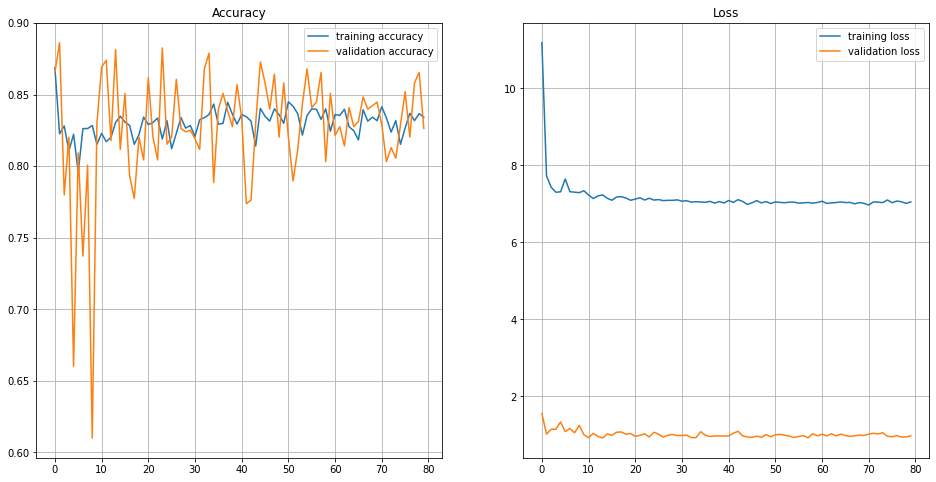

In [388]:
plot_loss_accuracy_history(history7)

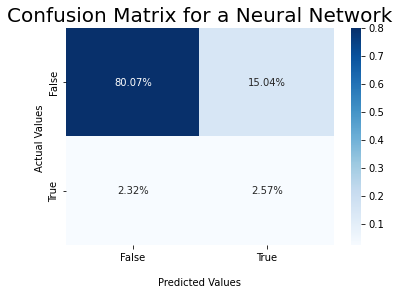

Precision:  0.14583333333333334
Recall:  0.525
F1 score:  0.22826086956521738


In [389]:
y_pred = model7.predict(X_valid1) >= 0.5
conf_mat = confusion_matrix(y_valid1, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Neural Network")
print_metrics(y_valid1, y_pred)

This is **our best result with neural networks so far**, and it is finally a result close to the ones produced by the previous ML algorithms.

#### Neural Network with f1-loss

We can observe an unexpected trend in the loss and accuracy functions above:

*   the validation loss is lower than the training loss, and is increasing while the training loss is decreasing
*   the accuracy is increasing both for the training and the validation set

We may notice that the binary crossentropy, used for the loss, is not a good indicator of the final f1-score. Thus, we may try to use a loss functions that is closer to the f1 score (actually, its inverse, since the loss function should be minimized and the score should be maximized).

Since the f1-score function is not differentiable, the following modified version of it will be used.

In [390]:
import keras.backend as K

def f1_loss(y_true, y_pred):
    '''
    source: https://www.kaggle.com/code/rejpalcz/best-loss-function-for-f1-score-metric/notebook
    '''
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)


In [391]:
input5_ = keras.layers.Input(shape=X_train.shape[1:])
hidden51 = keras.layers.Dense(30, activation="relu")(input5_)
hidden52 = keras.layers.Dense(30, activation="relu")(hidden51)
output5 = keras.layers.Dense(1, activation='sigmoid')(hidden52)
model5 = keras.models.Model(inputs=[input5_], outputs=[output5])

reset_seeds() 
model5.compile(loss=f1_loss, optimizer=keras.optimizers.Nadam(learning_rate=5e-3), metrics=['accuracy'])
history5 = model5.fit(X_train1, tf.cast(y_train1, tf.float32), epochs=200,
                      class_weight={0:5, 1:95},
                    validation_data=(X_valid1, tf.cast(y_valid1, tf.float32)),
                    batch_size=500)

Epoch 1/200
7/7 [==============================] - 2s 44ms/step - loss: 8.6040 - accuracy: 0.8972 - val_loss: 0.9039 - val_accuracy: 0.9303
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 8.3200 - accuracy: 0.9168 - val_loss: 0.8672 - val_accuracy: 0.8839
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 7.8592 - accuracy: 0.8847 - val_loss: 0.8210 - val_accuracy: 0.8594
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 7.4463 - accuracy: 0.8783 - val_loss: 0.7937 - val_accuracy: 0.8765
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 7.1862 - accuracy: 0.8869 - val_loss: 0.7839 - val_accuracy: 0.8802
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 6.9914 - accuracy: 0.8979 - val_loss: 0.7715 - val_accuracy: 0.8557
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 6.8533 - accuracy: 0.8859 - val_loss: 0.7807 - val_accuracy: 0.8888
Epoch 8/200
7/7 [=========

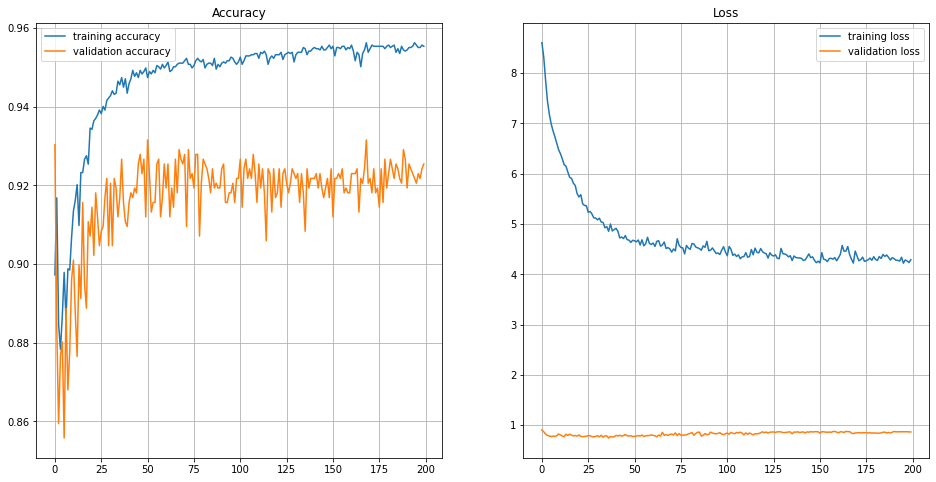

In [392]:
plot_loss_accuracy_history(history5)

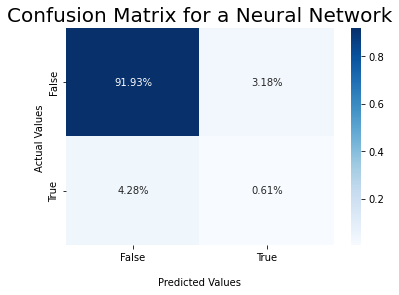

Precision:  0.16129032258064516
Recall:  0.125
F1 score:  0.14084507042253522


In [393]:
y_pred = model5.predict(X_valid1) >= 0.5
conf_mat = confusion_matrix(y_valid1, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Neural Network")
print_metrics(y_valid1, y_pred)

##### With regularization and early stopping

In [394]:
input6_ = keras.layers.Input(shape=X_train.shape[1:])
hidden61 = keras.layers.Dense(30, activation="relu",
                              kernel_regularizer=regularizers.L2(0.01))(input6_)
hidden62 = keras.layers.Dense(30, activation="relu", kernel_regularizer=regularizers.L2(0.01))(hidden61)
output6 = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01))(hidden62)
model6 = keras.models.Model(inputs=[input6_], outputs=[output6])

reset_seeds()
model6.compile(loss=f1_loss, optimizer=keras.optimizers.Nadam(learning_rate=5e-3), metrics=['accuracy'])
history6 = model6.fit(X_train1, tf.cast(y_train1, tf.float32), epochs=20,
                      class_weight={0:10, 1:90},
                    validation_data=(X_valid1, tf.cast(y_valid1, tf.float32)),
                    batch_size=500)

Epoch 1/20
7/7 [==============================] - 1s 38ms/step - loss: 13.2579 - accuracy: 0.9000 - val_loss: 1.3869 - val_accuracy: 0.9340
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 12.8208 - accuracy: 0.9205 - val_loss: 1.3309 - val_accuracy: 0.8875
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 12.1740 - accuracy: 0.8847 - val_loss: 1.2843 - val_accuracy: 0.8570
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 11.5648 - accuracy: 0.8758 - val_loss: 1.2620 - val_accuracy: 0.8802
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 11.1743 - accuracy: 0.8872 - val_loss: 1.2578 - val_accuracy: 0.8790
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 10.8906 - accuracy: 0.8979 - val_loss: 1.2459 - val_accuracy: 0.8496
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 10.6861 - accuracy: 0.8829 - val_loss: 1.2667 - val_accuracy: 0.8826
Epoch 8/20
7/7 [==========

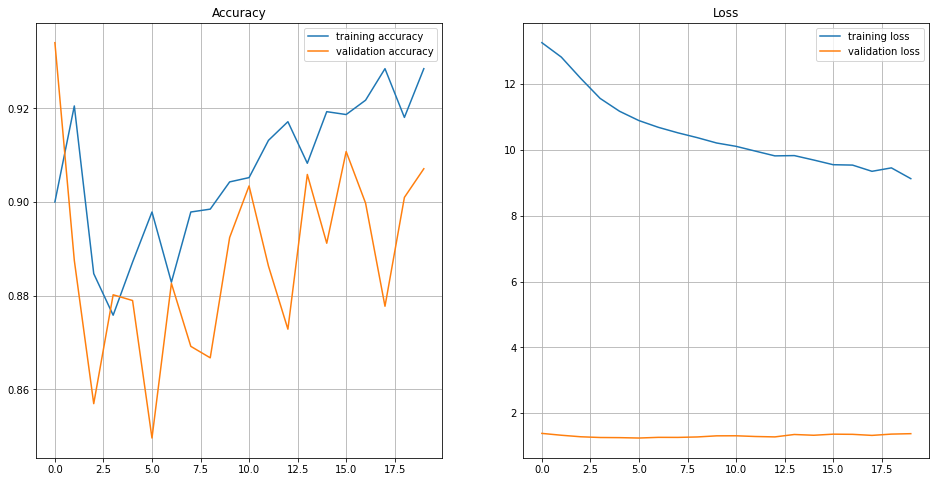

In [395]:
plot_loss_accuracy_history(history6)

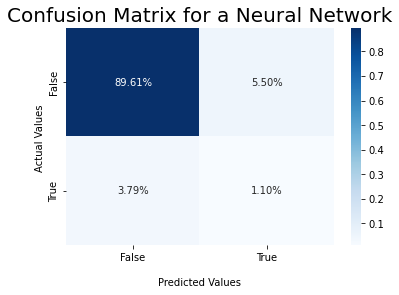

Precision:  0.16666666666666666
Recall:  0.225
F1 score:  0.19148936170212766


In [396]:
y_pred = model6.predict(X_valid1) >= 0.5
conf_mat = confusion_matrix(y_valid1, y_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion Matrix for a Neural Network")
print_metrics(y_valid1, y_pred)

Overall, the f1-score-based loss got in the same range as the binary crossentropy, but could not even get close to it: binary crossentropy still seems to perform better.

#### Conclusions about ANNs

Overall, the artificial neural networks reached a similar f1-score as the previous algorithms, but could not beat their record.

**The best f1-score was 0.244** for a network with

*   L2 regularization on each layer
*   binary crossentropy loss
*   class weights {0: 10, 1:90}

### Building the final Model

Overall, we obtained the best results when we combined the LogisticRegression-, the SVC- and the RandomForest-based models in a VotingClassifier.

We'll now add a model with the same parameters to the pipeline that we have previously built (note that we removed the feature name resetting step, since we are no longer interested in the semantic meaning of the features.).

In [397]:
final_model = VotingClassifier(
 estimators=[
             ('lr', LogisticRegression(max_iter=1000, random_state=random_state, class_weight={0:4, 1:96})), 
             ('rf', RandomForestClassifier(random_state=random_state, class_weight={0:4, 1:96}, n_estimators = 300, max_leaf_nodes = 30)), 
             ('svm', SVC(probability=True, random_state=random_state, gamma=0.005, C=5, class_weight={0:10, 1:90},))], 
  voting='soft')

In [398]:
final_pipeline = Pipeline([
        ('drop_irrelevant_features', ColumnDropperTransformer("id")),
        ('work_type_replacement_for_children', WorkTypeTransformer()), 
        ('smoking_status_replacement_for_small_children', SmokingStatusTransformer()), 
        ('column_processing', column_transformer),
        ('scaling', scaler),
        ('predictive_model', final_model)
])

#### Training

In [399]:
set_config(display="diagram")
final_pipeline.fit(X_stroke_tv_df, y_stroke_tv_df)

Pipeline(steps=[('drop_irrelevant_features',
                 ColumnDropperTransformer(columns='id')),
                ('work_type_replacement_for_children', WorkTypeTransformer()),
                ('smoking_status_replacement_for_small_children',
                 SmokingStatusTransformer()),
                ('column_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('multi_cat', OneHotEncoder(),
                                                  ['work_type',
                                                   'smoking_...
                ('scaling', StandardScaler()),
                ('predictive_model',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(class_weight={0: 4,
                                                                                1: 96},
                                                                  max_iter=1000,
                                                                  random_state=42)),
                                              ('rf',
                                               RandomForestClassifier(class_weight={0: 4,
                                                                                    1: 96},
                                                                      max_leaf_nodes=30,
                                                                      n_estimators=300,
                                                                      random_state=42)),
                                              ('svm',
                                               SVC(C=5,
                                                   class_weight={0: 10, 1: 90},
                                                   gamma=0.005,
                                                   probability=True,
                                                   random_state=42))],
                                  voting='soft'))])

#### Evaluation on the test dataset

In [400]:
y_test_pred = final_pipeline.predict(X_stroke_test_df)

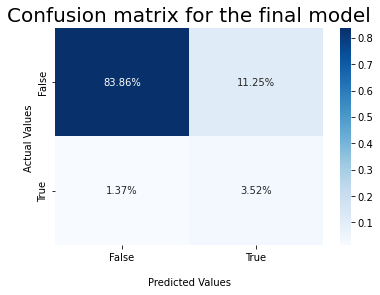

Precision:  0.23841059602649006
Recall:  0.72
F1 score:  0.3582089552238806


In [401]:
conf_mat = confusion_matrix(y_stroke_test_df, y_test_pred)
plot_confusion_matrix_with_percentages(conf_mat, "Confusion matrix for the final model")
print_metrics(y_stroke_test_df, y_test_pred)

## Final Conclusions

### Conclusions derived from data visualizations and experiments

#### The quality of the final model

We were not successful in obtaining a model that has a high F1 score, high recall and high precision. This could have been anticipated from the data visualization stage, as we did not have many features in our dataset that are highly correlated with having a stroke. Among the features only age was higher correlated, and it was not even a very strong correlation.

#### The final scores compared to other predictive models

We compared our results to those obtained by other data scientists on Kaggle. 

Unfortunally, we have identified that not all the results that were obtained in those notebooks are correctly obtained.
The main problems that occurred were:
*   Not identifying that having an imbalanced dataset the models will learn to predict false for every given entry thus having a high accuracy of 95% as only 5% of the data is with actual strokes. Accuracy is not a good instrument for measuring the quality of the model in this case.
Some examples with a model that predicts all false as seen in the confusion matrix: https://www.kaggle.com/code/mahmoudhassanmahmoud/stroke-prediction-by-using-rf-with-accuracy-93, https://www.kaggle.com/code/sanjay7013/stroke-prediction-dataset-easy-to-understand

*   Not correctly interpreting the results. In this example https://www.kaggle.com/code/ahmadalkhateeb123/unbalanced-data-stratified-k-fold/notebook#Using-RandomForest-balanced-vs-unbalanced, the results obtained seem correct, but we are interested in the F1 score obtained for the positive stroke.

*   Making oversampling on the validation set as well, thus achieving artificially high results, as the model is learning some patterns that are made by the SMOTE instead. 
   * https://www.kaggle.com/code/caioestrella/smote-voting-classifier-moving-threshold-96/notebook, https://www.kaggle.com/code/lechithinh/stroke-prediction-eda-7-models-99-accuracy#6)-FEATURE-SCALING
Some example of notebook that has correct results and interpretations:
   * https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5, for random forest, SVM and logistic regression.
   * https://www.kaggle.com/code/calebreigada/stroke-prediction-with-neural-networks-data-viz for neural networks.
But it seems that we managed to reach a somewhat higher score.


#### The relevance of the featues. Results compared to other research articles

The main risk factors for having a stroke that are emphasized in this article https://www.webmd.com/stroke/guide/stroke-causes-risks could also be found in our dataset: hypertension, smoking, hear disease avg glucose level(for diabetes), bmi (for weight and exercise), age and gender. Even though all these risk factors have some correlations with having a stroke, this correlations alone are not enough to build a model that successfully predicts strokes with high precision.

#### Arguments for the run experiments. Key learnings

We have tried to run the main ML algorithms and also run our own Neural Network as learnt from the Hands On Machine Learning with Scikit Learn Keras and Tensorflow book, writen by Aurélien Géron. 

Important considerations for fine tuning our models: 
*   we had to consider that our data is **imbalanced**, and we handled this problem by applying **class weights or by undersampling and oversampling** (actually, by producing some artificial entries) our dataset. 
*   **regularization** played a key role in obtaining the results that we have now, most importatntly in the case of SVCs and neural networks
*   the idea of having a **voting classifier** came form the fact we had some models that did not performed so good on their own, so we thought that having a model that tries to get some value from all of them would be better
*   **grid search and randomized search** were applied to find the optimal hyperparameters